# **U-Net (3D)**
 ---

<font size = 4> The 3D U-Net was first introduced by [Çiçek et al](https://arxiv.org/abs/1606.06650) for learning dense volumetric segmentations from sparsely annotated ground-truth data building upon the original U-Net architecture by [Ronneberger et al](https://arxiv.org/abs/1505.04597). 

<font size = 4>**This particular implementation allows supervised learning between any two types of 3D image data. If you are interested in image segmentation of 2D datasets, you should use the 2D U-Net notebook instead.**

---

<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the *Zero-Cost Deep-Learning to Enhance Microscopy* project ([ZeroCostDL4Mic](https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki)) jointly developed by the [Jacquemet](https://cellmig.org/) and [Henriques](https://henriqueslab.github.io/) laboratories and created by Daniel Krentzel. The BioImage Model Zoo export was jointly developed by [Estibaliz Gómez de Mariscal](https://github.com/esgomezm) (deepImageJ team).

<font size = 4>This notebook is laregly based on the following paper: 

<font size = 4>[**3D U-Net: Learning Dense Volumetric Segmentation from Sparse Annotation**](https://arxiv.org/pdf/1606.06650.pdf) by Özgün Çiçek *et al.* published on arXiv in 2016

<font size = 4>The following two Python libraries play an important role in the notebook: 

1. <font size = 4>[**Elasticdeform**](https://github.com/gvtulder/elasticdeform)
 by Gijs van Tulder was used to augment the 3D training data using elastic grid-based deformations as described in the original 3D U-Net paper. 

2. <font size = 4>[**Tifffile**](https://github.com/cgohlke/tifffile) by Christoph Gohlke is a great library for reading and writing TIFF files. 

3. <font size = 4>[**Imgaug**](https://github.com/aleju/imgaug) by Alexander Jung *et al.* is an amazing library for image augmentation in machine learning - it is the most complete and extensive image augmentation package I have found to date. 

<font size = 4>The [example dataset](https://www.epfl.ch/labs/cvlab/data/data-em/) represents a 5x5x5µm section taken from the CA1 hippocampus region of the brain with annotated mitochondria and was acquired by Graham Knott and Marco Cantoni at EPFL.

<font size = 4>The guidelines to use the trained network in ImageJ with deepImageJ are given in the following paper:

<font size = 4>**DeepImageJ: a user-friendly environment to run deep learning models in ImageJ**, bioRxiv (2019) by *Estibaliz Gómez-de-Mariscal, Carlos García-López-de-Haro, Wei Ouyang, Laurène Donati, Emma Lundberg, Michael Unser, Arrate Muñoz-Barrutia and Daniel Sage* (https://doi.org/10.1101/799270)

<font size = 4>**Please also cite the original paper and relevant Python libraries when using or developing this notebook.**


# **How to use this notebook?**

---

<font size = 4>Video describing how to use ZeroCostDL4Mic notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
### **Structure of a notebook**

<font size = 4>The notebook contains two types of cells:  

<font size = 4>**Text cells** provide information and can be modified by double-clicking the cell. You are currently reading a text cell. You can create a new one by clicking `+ Text`.

<font size = 4>**Code cells** contain code which can be modfied by selecting the cell. To execute the cell, move your cursor to the `[]`-symbol on the left side of the cell (a play button should appear). Click it to execute the cell. Once the cell is fully executed, the animation stops. You can create a new coding cell by clicking `+ Code`.

---
### **Table of contents, Code snippets** and **Files**

<font size = 4>Three tabs are located on the upper left side of the notebook:

1. <font size = 4>*Table of contents* contains the structure of the notebook. Click the headers to move quickly between sections.

2. <font size = 4>*Code snippets* provides a wide array of example code specific to Google Colab. You can ignore this when using this notebook.

3. <font size = 4>*Files* displays the current working directory. We will mount your Google Drive in Section 1.2. so that you can access your files and save them permanently.

<font size = 4>**Important:** All uploaded files are purged once the runtime ends.

<font size = 4>**Note:** The directory *sample data* in *Files* contains default files. Do not upload anything there!

---
### **Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive by clicking *File* -> *Save a copy in Drive*.

<font size = 4>To **edit a cell**, double click on the text. This will either display the source code (in code cells) or the [markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) (in text cells).
You can use `#` in code cells to comment out parts of the code. This allows you to keep the original piece of code while not executing it.


# **0. Before getting started**
---

<font size = 4>As the network operates in three dimensions, certain consideration should be given to correctly pre-processing the data. Ensure that the structure of interest does not substantially change between slices - image volumes with isotropic pixelsizes are ideal for this architecture.

<font size = 4>Each image volume must be provided as an **8-bit** or **binary multipage TIFF file** to maintain the correct ordering of individual image slices. If more than one image volume has been annotated, source and target files must be named identically and placed in separate directories. In case only one image volume has been annotated, source and target file do not have to be placed in separate directories and can be named differently, as long as their paths are explicitly provided in Section 3. 

<font size = 4>**Prepare two datasets** (*training* and *testing*) for quality control puproses. Make sure that the *testing* dataset does not overlap with the *training* dataset and is ideally sourced from a different acquisiton and sample to ensure robustness of the trained model. 


---


### **Directory structure**

<font size = 4>Make sure to adhere to one of the following directory structures. If only one annotated training volume exists, choose the first structure. In case more than one training volume is available, choose the second structure.

<font size = 4>**Structure 1:** Only one training volume
```
path/to/directory/with/one/training/volume
│--training_source.tif
│--training_target.tif
|   
│--testing_source.tif
|--testing_target.tif 
|
|--data_to_predict_on.tif
|--prediction_results.tif

```
<font size = 4>**Structure 2:** Various training volumes
```
path/to/directory/with/various/training/volumes
│--testing_source.tif
|--testing_target.tif 
|
└───training
|   └───source
|   |   |--training_volume_one.tif
|   |   |--training_volume_two.tif
|   |   |--...
|   |   |--training_volume_n.tif
|   |
|   └───target
|       |--training_volume_one.tif
|       |--training_volume_two.tif
|       |--...
|       |--training_volume_n.tif
|
|--data_to_predict_on.tif
|--prediction_results.tif
```
<font size = 4>**Note:** Naming directories is completely up to you, as long as the paths are correctly specified throughout the notebook.


---


### **Important note**

* <font size = 4>If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do so), you will need to run **Sections 1 - 4**, then use **Section 5** to assess the quality of your model and **Section 6** to run predictions using the model that you trained.

* <font size = 4>If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **Sections 1 and 2** to set up the notebook, then use **Section 5** to assess the quality of your model.

* <font size = 4> If you only wish to **Run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **Sections 1 and 2** to set up the notebook, then use **Section 6** to run the predictions on the desired model.
---


# **1. Install 3D U-Net dependencies**
---



## **1.1. Load key dependencies**
---
<font size = 4> 


In [1]:
# Run this cell to execute the code
from __future__ import absolute_import, division, print_function, unicode_literals
from datetime import datetime
import ipywidgets as widgets
from IPython.display import Markdown, display, clear_output
from matplotlib import pyplot as plt
import yaml as yaml_library
import os

ipywidgets_edit_yaml_config_path = os.path.join(os.getcwd(), 'results', 'widget_prev_settings.yaml')

def ipywidgets_edit_yaml(yaml_path, key, value):
    if os.path.exists(yaml_path):
        with open(yaml_path, 'r') as f:
            config_data = yaml_library.safe_load(f)
    else:
        config_data = {}
    config_data[key] = value
    with open(yaml_path, 'w') as new_f:
        yaml_library.safe_dump(config_data, new_f, width=10e10, default_flow_style=False, allow_unicode=True)

def ipywidgets_read_yaml(yaml_path, key):
    if os.path.exists(yaml_path):
        with open(yaml_path, 'r') as f:
            config_data = yaml_library.safe_load(f)
        value = config_data.get(key, '')
        return value
    else:
        return ''

internal_aux_initial_time=datetime.now()
print('Runnning...')
print('--------------------------------------')

Notebook_version = '2.2.1'
Network = 'U-Net (3D)'

from builtins import any as b_any

def get_requirements_path():
    # Store requirements file in 'contents' directory 
    current_dir = os.getcwd()
    dir_count = current_dir.count('/') - 1
    path = '../' * (dir_count) + 'requirements.txt'
    return path

def filter_files(file_list, filter_list):
    filtered_list = []
    for fname in file_list:
        if b_any(fname.split('==')[0] in s for s in filter_list):
            filtered_list.append(fname)
    return filtered_list

def build_requirements_file(before, after):
    path = get_requirements_path()

    # Exporting requirements.txt for local run
    !pip freeze > $path

    # Get minimum requirements file
    df = pd.read_csv(path)
    mod_list = [m.split('.')[0] for m in after if not m in before]
    req_list_temp = df.values.tolist()
    req_list = [x[0] for x in req_list_temp]

    # Replace with package name and handle cases where import name is different to module name
    mod_name_list = [['sklearn', 'scikit-learn'], ['skimage', 'scikit-image']]
    mod_replace_list = [[x[1] for x in mod_name_list] if s in [x[0] for x in mod_name_list] else s for s in mod_list] 
    filtered_list = filter_files(req_list, mod_replace_list)

    file=open(path,'w')
    for item in filtered_list:
        file.writelines(item)

    file.close()

import sys
before = [str(m) for m in sys.modules]

#Put the imported code and libraries here

try:
    import elasticdeform
except:
    import elasticdeform

try:
    import tifffile
except:
    import tifffile

try:
    import imgaug.augmenters as iaa
except:
    import imgaug.augmenters as iaa

import os
import csv
import random
import h5py
import imageio
import math
import shutil

import pandas as pd
from glob import glob
from tqdm import tqdm

from skimage import transform
from skimage import exposure
from skimage import color
from skimage import io

from scipy.ndimage import zoom

import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))

# from keras import backend as K

# from keras.layers import Conv3D
# from keras.layers import BatchNormalization
# from keras.layers import ReLU
# from keras.layers import MaxPooling3D
# from keras.layers import Conv3DTranspose
# from keras.layers import Input
# from keras.layers import Concatenate

# from keras.models import Model

# from keras.utils import Sequence
# from keras.callbacks import ModelCheckpoint
# from keras.callbacks import CSVLogger
# from keras.callbacks import Callback

from tensorflow.keras import backend as K

from tensorflow.keras.layers import Conv3D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import MaxPooling3D
from tensorflow.keras.layers import Conv3DTranspose
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate

from tensorflow.keras.models import Model

from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import Callback

from tensorflow.keras.metrics import RootMeanSquaredError

from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from ipywidgets import interact
from ipywidgets import interactive
from ipywidgets import fixed
from ipywidgets import interact_manual 
import ipywidgets as widgets

from fpdf import FPDF, HTMLMixin
from datetime import datetime
import subprocess
from pip._internal.operations.freeze import freeze
import time

from skimage import io
import matplotlib

from skimage import io
from shutil import rmtree
from bioimageio.core.build_spec import build_model, add_weights
from bioimageio.core.resource_tests import test_model
from bioimageio.core.weight_converter.keras import convert_weights_to_tensorflow_saved_model_bundle

print("Dependencies installed and imported.")

#Create a variable to get and store relative base path
base_path = os.getcwd()

# Define MultiPageTiffGenerator class
class MultiPageTiffGenerator(Sequence):

    def __init__(self,
                 source_path,
                 target_path,
                 batch_size=1,
                 shape=(128,128,32,1),
                 augment=False,
                 augmentations=[],
                 deform_augment=False,
                 deform_augmentation_params=(5,3,4),
                 val_split=0.2,
                 is_val=False,
                 random_crop=True,
                 downscale=1,
                 binary_target=False):

        # If directory with various multi-page tiffiles is provided read as list
        if os.path.isfile(source_path):
            self.dir_flag = False
            self.source = tifffile.imread(source_path)
            if binary_target:
                self.target = tifffile.imread(target_path).astype(bool)
            else:
                self.target = tifffile.imread(target_path)

        elif os.path.isdir(source_path):
            self.dir_flag = True
            self.source_dir_list = glob(os.path.join(source_path, '*'))
            self.target_dir_list = glob(os.path.join(target_path, '*'))

            self.source_dir_list.sort()
            self.target_dir_list.sort()

        self.shape = shape
        self.batch_size = batch_size
        self.augment = augment
        self.val_split = val_split
        self.is_val = is_val
        self.random_crop = random_crop
        self.downscale = downscale
        self.binary_target = binary_target
        self.deform_augment = deform_augment
        self.on_epoch_end()
        
        if self.augment:
            # pass list of augmentation functions 
            self.seq = iaa.Sequential(augmentations, random_order=True) # apply augmenters in random order
        if self.deform_augment:
            self.deform_sigma, self.deform_points, self.deform_order = deform_augmentation_params

    def __len__(self):
        # If various multi-page tiff files provided sum all images within each
        if self.augment:
            augment_factor = 4
        else:
            augment_factor = 1
    
        if self.dir_flag:
            num_of_imgs = 0
            for tiff_path in self.source_dir_list:
                num_of_imgs += tifffile.imread(tiff_path).shape[0]
            xy_shape = tifffile.imread(self.source_dir_list[0]).shape[1:]

            if self.is_val:
                if self.random_crop:
                    crop_volume = self.shape[0] * self.shape[1] * self.shape[2]
                    volume = xy_shape[0] * xy_shape[1] * self.val_split * num_of_imgs
                    return math.floor(augment_factor * volume / (crop_volume * self.batch_size * self.downscale))
                else:
                    return math.floor(self.val_split * num_of_imgs / self.batch_size)
            else:
                if self.random_crop:
                    crop_volume = self.shape[0] * self.shape[1] * self.shape[2]
                    volume = xy_shape[0] * xy_shape[1] * (1 - self.val_split) * num_of_imgs
                    return math.floor(augment_factor * volume / (crop_volume * self.batch_size * self.downscale))

                else:
                    return math.floor(augment_factor*(1 - self.val_split) * num_of_imgs/self.batch_size)
        else:
            if self.is_val:
                if self.random_crop:
                    crop_volume = self.shape[0] * self.shape[1] * self.shape[2]
                    volume = self.source.shape[0] * self.source.shape[1] * self.val_split * self.source.shape[2]
                    return math.floor(augment_factor * volume / (crop_volume * self.batch_size * self.downscale))
                else:
                    return math.floor((self.val_split * self.source.shape[0] / self.batch_size))
            else:
                if self.random_crop:
                    crop_volume = self.shape[0] * self.shape[1] * self.shape[2]
                    volume = self.source.shape[0] * self.source.shape[1] * (1 - self.val_split) * self.source.shape[2]
                    return math.floor(augment_factor * volume / (crop_volume * self.batch_size * self.downscale))
                else:
                    return math.floor(augment_factor * (1 - self.val_split) * self.source.shape[0] / self.batch_size)

    def __getitem__(self, idx):
        source_batch = np.empty((self.batch_size,
                                 self.shape[0],
                                 self.shape[1],
                                 self.shape[2],
                                 self.shape[3]))
        target_batch = np.empty((self.batch_size,
                                 self.shape[0],
                                 self.shape[1],
                                 self.shape[2],
                                 self.shape[3]))

        for batch in range(self.batch_size):
            # Modulo operator ensures IndexError is avoided
            stack_start = self.batch_list[(idx+batch*self.shape[2])%len(self.batch_list)]

            if self.dir_flag:
                self.source = tifffile.imread(self.source_dir_list[stack_start[0]])
                if self.binary_target:
                    self.target = tifffile.imread(self.target_dir_list[stack_start[0]]).astype(bool)
                else:
                    self.target = tifffile.imread(self.target_dir_list[stack_start[0]])

            src_list = []
            tgt_list = []
            for i in range(stack_start[1], stack_start[1]+self.shape[2]):
                src = self.source[i]
                src = transform.downscale_local_mean(src, (self.downscale, self.downscale))
                if not self.random_crop:
                    src = transform.resize(src, (self.shape[0], self.shape[1]), mode='constant', preserve_range=True)
                src = self._min_max_scaling(src)
                src_list.append(src)

                tgt = self.target[i]
                tgt = transform.downscale_local_mean(tgt, (self.downscale, self.downscale))
                if not self.random_crop:
                    tgt = transform.resize(tgt, (self.shape[0], self.shape[1]), mode='constant', preserve_range=True)
                if not self.binary_target:
                    tgt = self._min_max_scaling(tgt)
                tgt_list.append(tgt)

            if self.random_crop:
                if src.shape[0] == self.shape[0]:
                    x_rand = 0
                if src.shape[1] == self.shape[1]:
                    y_rand = 0
                if src.shape[0] > self.shape[0]:
                    x_rand = np.random.randint(src.shape[0] - self.shape[0])
                if src.shape[1] > self.shape[1]:
                    y_rand = np.random.randint(src.shape[1] - self.shape[1])
                if src.shape[0] < self.shape[0] or src.shape[1] < self.shape[1]:
                    raise ValueError('Patch shape larger than (downscaled) source shape')
            
            for i in range(self.shape[2]):
                if self.random_crop:
                    src = src_list[i]
                    tgt = tgt_list[i]
                    src_crop = src[x_rand:self.shape[0]+x_rand, y_rand:self.shape[1]+y_rand]
                    tgt_crop = tgt[x_rand:self.shape[0]+x_rand, y_rand:self.shape[1]+y_rand]
                else:
                    src_crop = src_list[i]
                    tgt_crop = tgt_list[i]

                source_batch[batch,:,:,i,0] = src_crop
                target_batch[batch,:,:,i,0] = tgt_crop

        if self.augment:
            # On-the-fly data augmentation
            source_batch, target_batch = self.augment_volume(source_batch, target_batch)

            # Data augmentation by reversing stack
            if np.random.random() > 0.5:
                source_batch, target_batch = source_batch[::-1], target_batch[::-1]
            
            # Data augmentation by elastic deformation
            if np.random.random() > 0.5 and self.deform_augment:
                source_batch, target_batch = self.deform_volume(source_batch, target_batch)
            
            if not self.binary_target:
                target_batch = self._min_max_scaling(target_batch)
            
            return self._min_max_scaling(source_batch), target_batch
        
        else:
            return source_batch, target_batch

    def on_epoch_end(self):
        # Validation split performed here
        self.batch_list = []
        # Create batch_list of all combinations of tifffile and stack position
        if self.dir_flag:
            for i in range(len(self.source_dir_list)):
                num_of_pages = tifffile.imread(self.source_dir_list[i]).shape[0]
                if self.is_val:
                    start_page = num_of_pages-math.floor(self.val_split*num_of_pages)
                    for j in range(start_page, num_of_pages-self.shape[2]):
                      self.batch_list.append([i, j])
                else:
                    last_page = math.floor((1-self.val_split)*num_of_pages)
                    for j in range(last_page-self.shape[2]):
                        self.batch_list.append([i, j])
        else:
            num_of_pages = self.source.shape[0]
            if self.is_val:
                start_page = num_of_pages-math.floor(self.val_split*num_of_pages)
                for j in range(start_page, num_of_pages-self.shape[2]):
                    self.batch_list.append([0, j])

            else:
                last_page = math.floor((1-self.val_split)*num_of_pages)
                for j in range(last_page-self.shape[2]):
                    self.batch_list.append([0, j])
        
        if self.is_val and (len(self.batch_list) <= 0):
            raise ValueError('validation_split too small! Increase val_split or decrease z-depth')
        random.shuffle(self.batch_list)
   
    def _min_max_scaling(self, data):
        n = data - np.min(data)
        d = np.max(data) - np.min(data) 
        
        return n/d
   
    def class_weights(self):
        ones = 0
        pixels = 0

        if self.dir_flag:
            for i in range(len(self.target_dir_list)):
                tgt = tifffile.imread(self.target_dir_list[i]).astype(bool)
                ones += np.sum(tgt)
                pixels += tgt.shape[0]*tgt.shape[1]*tgt.shape[2]
        else:
          ones = np.sum(self.target)
          pixels = self.target.shape[0]*self.target.shape[1]*self.target.shape[2]
        p_ones = ones/pixels
        p_zeros = 1-p_ones

        # Return swapped probability to increase weight of unlikely class
        return p_ones, p_zeros

    def deform_volume(self, src_vol, tgt_vol):
        [src_dfrm, tgt_dfrm] = elasticdeform.deform_random_grid([src_vol, tgt_vol],
                                                                axis=(1, 2, 3),
                                                                sigma=self.deform_sigma,
                                                                points=self.deform_points,
                                                                order=self.deform_order)
        if self.binary_target:
            tgt_dfrm = tgt_dfrm > 0.1
        
        return self._min_max_scaling(src_dfrm), tgt_dfrm 

    def augment_volume(self, src_vol, tgt_vol):
        
        src_vol_aug = np.empty(src_vol.shape)
        tgt_vol_aug = np.empty(tgt_vol.shape)

        for i in range(src_vol.shape[3]):
            src_aug_z, tgt_aug_z = self.seq(images=src_vol[:,:,:,i,0].astype('float16'), 
                                                                      segmentation_maps=np.expand_dims(tgt_vol[:,:,:,i,0].astype(bool), axis=-1))
            src_vol_aug[:,:,:,i,0] = src_aug_z 
            tgt_vol_aug[:,:,:,i,0] = np.squeeze(tgt_aug_z)
        return self._min_max_scaling(src_vol_aug), tgt_vol_aug

    def sample_augmentation(self, idx):
        src, tgt = self.__getitem__(idx)

        src_aug, tgt_aug = self.augment_volume(src, tgt)
        
        if self.deform_augment:
            src_aug, tgt_aug = self.deform_volume(src_aug, tgt_aug)

        return src_aug, tgt_aug 

# Define custom loss and dice coefficient
def dice_coefficient(y_true, y_pred):
    eps = 1e-6
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f*y_pred_f)

    return (2.*intersection)/(K.sum(y_true_f*y_true_f)+K.sum(y_pred_f*y_pred_f)+eps)

def weighted_binary_crossentropy(zero_weight, one_weight):
    def _weighted_binary_crossentropy(y_true, y_pred):
        binary_crossentropy = K.binary_crossentropy(y_true, y_pred)

        weight_vector = y_true*one_weight+(1.-y_true)*zero_weight
        weighted_binary_crossentropy = weight_vector*binary_crossentropy

        return K.mean(weighted_binary_crossentropy)

    return _weighted_binary_crossentropy

# Custom callback showing sample prediction
class SampleImageCallback(Callback):

    def __init__(self, model, sample_data, model_path, save=False):
        self.model = model
        self.sample_data = sample_data
        self.model_path = model_path
        self.save = save

    def on_epoch_end(self, epoch, logs={}):
        sample_predict = self.model.predict_on_batch(self.sample_data)

        f=plt.figure(figsize=(16,8))
        plt.subplot(1,2,1)
        plt.imshow(self.sample_data[0,:,:,0,0], interpolation='nearest', cmap='gray')
        plt.title('Sample source')
        plt.axis('off');

        plt.subplot(1,2,2)
        plt.imshow(sample_predict[0,:,:,0,0], interpolation='nearest', cmap='magma')
        plt.title('Predicted target')
        plt.axis('off');

        plt.show()

        if self.save:
            plt.savefig(self.model_path + '/epoch_' + str(epoch+1) + '.png')

# Define Unet3D class
class Unet3D:

    def __init__(self,
                 shape=(256,256,16,1)):
        if isinstance(shape, str):
            shape = eval(shape)

        self.shape = shape
        
        input_tensor = Input(self.shape, name='input')

        self.model = self.unet_3D(input_tensor)

    def down_block_3D(self, input_tensor, filters):
        x = Conv3D(filters=filters, kernel_size=(3,3,3), padding='same')(input_tensor)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv3D(filters=filters*2, kernel_size=(3,3,3), padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        return x

    def up_block_3D(self, input_tensor, concat_layer, filters):
        x = Conv3DTranspose(filters, kernel_size=(2,2,2), strides=(2,2,2))(input_tensor)

        x = Concatenate()([x, concat_layer])

        x = Conv3D(filters=filters, kernel_size=(3,3,3), padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv3D(filters=filters*2, kernel_size=(3,3,3), padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        return x

    def unet_3D(self, input_tensor, filters=32):
        d1 = self.down_block_3D(input_tensor, filters=filters)
        p1 = MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2), data_format='channels_last')(d1)
        d2 = self.down_block_3D(p1, filters=filters*2)
        p2 = MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2), data_format='channels_last')(d2)
        d3 = self.down_block_3D(p2, filters=filters*4)
        p3 = MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2), data_format='channels_last')(d3)

        d4 = self.down_block_3D(p3, filters=filters*8)

        u1 = self.up_block_3D(d4, d3, filters=filters*4)
        u2 = self.up_block_3D(u1, d2, filters=filters*2)
        u3 = self.up_block_3D(u2, d1, filters=filters)

        output_tensor = Conv3D(filters=1, kernel_size=(1,1,1), activation='sigmoid')(u3)

        return Model(inputs=[input_tensor], outputs=[output_tensor])

    def summary(self):
        return self.model.summary()

    # Pass generators instead
    def train(self, 
              epochs, 
              batch_size, 
              train_generator,
              val_generator, 
              model_path, 
              model_name,
              optimizer='adam',
              learning_rate=0.001,
              loss='weighted_binary_crossentropy',
              metrics='dice',
              ckpt_period=1, 
              save_best_ckpt_only=False, 
              ckpt_path=None):

        class_weight_zero, class_weight_one = train_generator.class_weights()
        
        if loss == 'weighted_binary_crossentropy':
            loss = weighted_binary_crossentropy(class_weight_zero, class_weight_one)
        
        if metrics == 'dice':
            metrics = dice_coefficient

        if optimizer == 'adam':
            optimizer = Adam(learning_rate=learning_rate)
        elif optimizer == 'sgd':
            optimizer = SGD(learning_rate=learning_rate)
        elif optimizer == 'rmsprop':
            optimizer = RMSprop(learning_rate=learning_rate)

        self.model.compile(optimizer=optimizer,
                           loss=loss,
                           metrics=[metrics])

        if ckpt_path is not None:
            self.model.load_weights(ckpt_path)

        full_model_path = os.path.join(model_path, model_name)

        if not os.path.exists(full_model_path):
            os.makedirs(full_model_path)
        
        log_dir = full_model_path + '/Quality Control'

        if not os.path.exists(log_dir):
            os.makedirs(log_dir)
        
        ckpt_dir =  full_model_path + '/ckpt'

        if not os.path.exists(ckpt_dir):
            os.makedirs(ckpt_dir)

        csv_out_name = log_dir + '/training_evaluation.csv'
        if ckpt_path is None:
            csv_logger = CSVLogger(csv_out_name)
        else:
            csv_logger = CSVLogger(csv_out_name, append=True)

        if save_best_ckpt_only:
            ckpt_name = ckpt_dir + '/' + model_name + '.hdf5'
        else:
            ckpt_name = ckpt_dir + '/' + model_name + '_epoch_{epoch:02d}_val_loss_{val_loss:.4f}.hdf5'
        
        model_ckpt = ModelCheckpoint(ckpt_name,
                                     verbose=1,
                                     save_freq=ckpt_period,
                                     save_best_only=save_best_ckpt_only,
                                     save_weights_only=True)

        sample_batch, __ = val_generator.__getitem__(random.randint(0, len(val_generator)))
        sample_img = SampleImageCallback(self.model, 
                                         sample_batch, 
                                         model_path)

        self.model.fit(train_generator,
                       validation_data=val_generator,
                       validation_steps=math.floor(len(val_generator)/batch_size),
                       epochs=epochs,
                       callbacks=[csv_logger,
                                  model_ckpt,
                                  sample_img])

        last_ckpt_name = ckpt_dir + '/' + model_name + '_last.hdf5'
        self.model.save_weights(last_ckpt_name)

    def _min_max_scaling(self, data):
        n = data - np.min(data)
        d = np.max(data) - np.min(data) 
        
        return n/d

    def predict(self, 
                input, 
                ckpt_path, 
                z_range=None, 
                downscaling=None, 
                true_patch_size=None):

        self.model.load_weights(ckpt_path)

        if isinstance(downscaling, str):
            downscaling = eval(downscaling)

        if math.isnan(downscaling):
            downscaling = None

        if isinstance(true_patch_size, str):
            true_patch_size = eval(true_patch_size)
        
        if not isinstance(true_patch_size, tuple): 
            if math.isnan(true_patch_size):
                true_patch_size = None

        if isinstance(input, str):
            src_volume = tifffile.imread(input)
        elif isinstance(input, np.ndarray):
            src_volume = input
        else:
            raise TypeError('Input is not path or numpy array!')
        
        in_size = src_volume.shape

        if downscaling or true_patch_size is not None:
            x_scaling = 0
            y_scaling = 0

            if true_patch_size is not None:
                x_scaling += true_patch_size[0]/self.shape[0]
                y_scaling += true_patch_size[1]/self.shape[1]
            if downscaling is not None:
                x_scaling += downscaling
                y_scaling += downscaling

            src_list = []
            for i in range(src_volume.shape[0]):
                 src_list.append(transform.downscale_local_mean(src_volume[i], (int(x_scaling), int(y_scaling))))
            src_volume = np.array(src_list)          

        if z_range is not None:
            src_volume = src_volume[z_range[0]:z_range[1]]

        src_volume = self._min_max_scaling(src_volume)       

        src_array = np.zeros((1,
                              math.ceil(src_volume.shape[1]/self.shape[0])*self.shape[0], 
                              math.ceil(src_volume.shape[2]/self.shape[1])*self.shape[1],
                              math.ceil(src_volume.shape[0]/self.shape[2])*self.shape[2], 
                              self.shape[3]))

        for i in range(src_volume.shape[0]):
            src_array[0,:src_volume.shape[1],:src_volume.shape[2],i,0] = src_volume[i]

        pred_array = np.empty(src_array.shape)
        print(src_volume.dtype)
        for i in range(math.ceil(src_volume.shape[1]/self.shape[0])):
          for j in range(math.ceil(src_volume.shape[2]/self.shape[1])):
            for k in range(math.ceil(src_volume.shape[0]/self.shape[2])):
                pred_temp = self.model.predict(src_array[:,
                                                         i*self.shape[0]:i*self.shape[0]+self.shape[0],
                                                         j*self.shape[1]:j*self.shape[1]+self.shape[1],
                                                         k*self.shape[2]:k*self.shape[2]+self.shape[2]])
                pred_array[:,
                           i*self.shape[0]:i*self.shape[0]+self.shape[0],
                           j*self.shape[1]:j*self.shape[1]+self.shape[1],
                           k*self.shape[2]:k*self.shape[2]+self.shape[2]] = pred_temp
                           
        pred_volume = np.rollaxis(np.squeeze(pred_array), -1)[:src_volume.shape[0],:src_volume.shape[1],:src_volume.shape[2]]            

        if downscaling is not None:
            pred_list = []
            for i in range(pred_volume.shape[0]):
                 pred_list.append(transform.resize(pred_volume[i], (in_size[1], in_size[2]), preserve_range=True))
            pred_volume = np.array(pred_list)

        return pred_volume

def pdf_export(trained = False, augmentation = False, pretrained_model = False):
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 

  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Training report for '+Network+' model ('+model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 
  pdf.ln(1)

  # add another cell 
  if trained:
    training_time = "Training time: "+str(hour)+ "hour(s) "+str(mins)+"min(s) "+str(round(sec))+"sec(s)"
    pdf.cell(190, 5, txt = training_time, ln = 1, align='L')
  pdf.ln(1)

  Header_2 = 'Information for your materials and methods:'
  pdf.cell(190, 5, txt=Header_2, ln=1, align='L')
  pdf.ln(1)

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '
  #print(all_packages)

  #Main Packages
  main_packages = ''
  version_numbers = []
  for name in ['tensorflow','numpy','keras']:
    find_name=all_packages.find(name)
    main_packages = main_packages+all_packages[find_name:all_packages.find(',',find_name)]+', '
    #Version numbers only here:
    version_numbers.append(all_packages[find_name+len(name)+2:all_packages.find(',',find_name)])

  try:
    cuda_version = subprocess.run(["nvcc","--version"],stdout=subprocess.PIPE)
    cuda_version = cuda_version.stdout.decode('utf-8')
    cuda_version = cuda_version[cuda_version.find(', V')+3:-1]
  except:
    cuda_version = ' - No cuda found - '
  try:
    gpu_name = subprocess.run(["nvidia-smi"],stdout=subprocess.PIPE)
    gpu_name = gpu_name.stdout.decode('utf-8')
    gpu_name = gpu_name[gpu_name.find('Tesla'):gpu_name.find('Tesla')+10]
  except:
    gpu_name = ' - No GPU found - '
  #print(cuda_version[cuda_version.find(', V')+3:-1])
  #print(gpu_name)

  if os.path.isdir(training_source):
    shape = io.imread(training_source+'/'+os.listdir(training_source)[0]).shape
  elif os.path.isfile(training_source):
    shape = io.imread(training_source).shape
  else:
    print('Cannot read training data.')

  dataset_size = len(train_generator)

  text = 'The '+Network+' model was trained from scratch for '+str(number_of_epochs)+' epochs on '+str(dataset_size)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_size)+') with a batch size of '+str(batch_size)+' and a '+loss_function+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), keras (v '+version_numbers[2]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  if pretrained_model:
    text = 'The '+Network+' model was trained for '+str(number_of_epochs)+' epochs on '+str(dataset_size)+' paired image patches (image dimensions: '+str(shape)+', patch_size: '+str(patch_size)+') with a batch size of '+str(batch_size)+' and a '+loss_function+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). The model was retrained from a pretrained model. Key python packages used include tensorflow (v '+version_numbers[0]+'), keras (v '+version_numbers[2]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  pdf.set_font('')
  pdf.set_font_size(10.)
  pdf.multi_cell(190, 5, txt = text, align='L')
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(28, 5, txt='Augmentation: ', ln=0)
  pdf.set_font('')
  if augmentation:
    aug_text = 'The dataset was augmented by'
    if add_gaussian_blur == True:
      aug_text = aug_text+'\n- gaussian blur'
    if add_linear_contrast == True:
      aug_text = aug_text+'\n- linear contrast'
    if add_additive_gaussian_noise == True:
      aug_text = aug_text+'\n- additive gaussian noise'
    if augmenters != '':
      aug_text = aug_text+'\n- imgaug augmentations: '+augmenters
    if add_elastic_deform == True:
      aug_text = aug_text+'\n- elastic deformation'
  else:
    aug_text = 'No augmentation was used for training.'
  pdf.multi_cell(190, 5, txt=aug_text, align='L')
  pdf.ln(1)
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  if use_default_advanced_parameters:
    pdf.cell(200, 5, txt='Default Advanced Parameters were enabled')
  pdf.cell(200, 5, txt='The following parameters were used for training:')
  pdf.ln(1)
  html = """ 
  <table width=60% style="margin-left:0px;">
    <tr>
      <th width = 50% align="left">Parameter</th>
      <th width = 50% align="left">Value</th>
    </tr>
    <tr>
      <td width = 50%>number_of_epochs</td>
      <td width = 50%>{0}</td>
    </tr>
    <tr>
      <td width = 50%>batch_size</td>
      <td width = 50%>{1}</td>
    </tr>
    <tr>
      <td width = 50%>patch_size</td>
      <td width = 50%>{2}</td>
    </tr>
    <tr>
      <td width = 50%>image_pre_processing</td>
      <td width = 50%>{3}</td>
    </tr>
    <tr>
      <td width = 50%>validation_split_in_percent</td>
      <td width = 50%>{4}</td>
    </tr>
      <tr>
      <td width = 50%>downscaling_in_xy</td>
      <td width = 50%>{5}</td>
    </tr>
      <tr>
      <td width = 50%>binary_target</td>
      <td width = 50%>{6}</td>
    </tr>
    <tr>
      <td width = 50%>loss_function</td>
      <td width = 50%>{7}</td>
    </tr>
    <tr>
      <td width = 50%>metrics</td>
      <td width = 50%>{8}</td>
    </tr>
    <tr>
      <td width = 50%>optimizer</td>
      <td width = 50%>{9}</td>
    </tr>
    <tr>
      <td width = 50%>checkpointing_period</td>
      <td width = 50%>{10}</td>
    </tr>
    <tr>
      <td width = 50%>save_best_only</td>
      <td width = 50%>{11}</td>
    </tr>
    <tr>
      <td width = 50%>resume_training</td>
      <td width = 50%>{12}</td>
    </tr>
  </table>
  """.format(number_of_epochs,batch_size,str(patch_size[0])+'x'+str(patch_size[1])+'x'+str(patch_size[2]),image_pre_processing, validation_split_in_percent, downscaling_in_xy, str(binary_target), loss_function, metrics, optimizer, checkpointing_period, str(save_best_only), str(resume_training))
  pdf.write_html(html)

  #pdf.multi_cell(190, 5, txt = text_2, align='L')
  pdf.set_font("Arial", size = 11, style='B')
  pdf.ln(1)
  pdf.cell(190, 5, txt = 'Training Dataset', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(30, 5, txt= 'Training_source:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = training_source, align = 'L')
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(28, 5, txt= 'Training_target:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = training_target, align = 'L')
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(21, 5, txt= 'Model Path:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = model_path+'/'+model_name, align = 'L')
  pdf.ln(1)
  pdf.cell(60, 5, txt = 'Example Training pair (single slice)', ln=1)
  pdf.ln(1)
  exp_size = io.imread(base_path + '/TrainingDataExample_Unet3D.png').shape
  pdf.image(base_path + '/TrainingDataExample_Unet3D.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  pdf.ln(1)
  ref_2 = '- Unet 3D: Çiçek, Özgün, et al. "3D U-Net: learning dense volumetric segmentation from sparse annotation." International conference on medical image computing and computer-assisted intervention. Springer, Cham, 2016.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  # if Use_Data_augmentation:
  #   ref_4 = '- Augmentor: Bloice, Marcus D., Christof Stocker, and Andreas Holzinger. "Augmentor: an image augmentation library for machine learning." arXiv preprint arXiv:1708.04680 (2017).'
  #   pdf.multi_cell(190, 5, txt = ref_4, align='L')
  pdf.ln(3)
  reminder = 'Important:\nRemember to perform the quality control step on all newly trained models\nPlease consider depositing your training dataset on Zenodo'
  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')
  pdf.ln(1)

  pdf.output(model_path+'/'+model_name+'/'+model_name+'_training_report.pdf')

  print('------------------------------')
  print('PDF report exported in '+model_path+'/'+model_name+'/')

def qc_pdf_export():
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 

  Network = 'U-Net 3D'

  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Quality Control report for '+Network+' model ('+qc_model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 
  pdf.ln(1)

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '

  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Loss curves', ln=1, align='L')
  pdf.ln(1)
  if os.path.exists(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/lossCurvePlots.png'):
    exp_size = io.imread(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/lossCurvePlots.png').shape
    pdf.image(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/lossCurvePlots.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  else:
    pdf.set_font('')
    pdf.set_font('Arial', size=10)
    pdf.multi_cell(190, 5, txt='If you would like to see the evolution of the loss function during training please play the first cell of the QC section in the notebook.')
  pdf.ln(2)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(3)
  pdf.cell(80, 5, txt = 'Example Quality Control Visualisation', ln=1)
  pdf.ln(1)
  exp_size = io.imread(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/QC_example_data.png').shape
  pdf.image(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/QC_example_data.png', x = 5, y = None, w = round(exp_size[1]/12), h = round(exp_size[0]/8))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'IoU threshold optimisation', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  pdf.ln(1)
  pdf.cell(120, 5, txt='Highest IoU is {:.4f} with a threshold of {}'.format(best_iou, best_thresh), align='L', ln=1)
  pdf.ln(2)
  exp_size = io.imread(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/QC_IoU_analysis.png').shape
  pdf.image(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/QC_IoU_analysis.png', x=16, y=None, w = round(exp_size[1]/6), h = round(exp_size[0]/6))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  pdf.ln(1)
  ref_2 = '- Unet 3D: Çiçek, Özgün, et al. "3D U-Net: learning dense volumetric segmentation from sparse annotation." International conference on medical image computing and computer-assisted intervention. Springer, Cham, 2016.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  pdf.ln(1)

  pdf.ln(3)
  reminder = 'To find the parameters and other information about how this model was trained, go to the training_report.pdf of this model which should be in the folder of the same name.'

  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')
  pdf.ln(1)

  pdf.output(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/'+qc_model_name+'_QC_report.pdf')

  print('------------------------------')
  print('QC PDF report exported in '+os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/')

# -------------- Other definitions -----------
W  = '\033[0m'  # white (normal)
R  = '\033[31m' # red
prediction_prefix = 'Predicted_'

print('-------------------')
print('U-Net 3D and dependencies installed.')

# Colors for the warning messages
class bcolors:
  WARNING = '\033[31m'
  NORMAL = '\033[0m'  # white (normal)
  
# Check if this is the latest version of the notebook
# Latest_notebook_version = pd.read_csv("https://raw.githubusercontent.com/HenriquesLab/ZeroCostDL4Mic/master/Colab_notebooks/Latest_ZeroCostDL4Mic_Release.csv")

# if Notebook_version == list(Latest_notebook_version.columns):
#   print("This notebook is up-to-date.")

# if not Notebook_version == list(Latest_notebook_version.columns):
#   print(bcolors.WARNING +"A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")

All_notebook_versions = pd.read_csv("https://raw.githubusercontent.com/HenriquesLab/ZeroCostDL4Mic/master/Colab_notebooks/Latest_Notebook_versions.csv", dtype=str)
print('Notebook version: '+Notebook_version)
Latest_Notebook_version = All_notebook_versions[All_notebook_versions["Notebook"] == Network]['Version'].iloc[0]
print('Latest notebook version: '+Latest_Notebook_version)
if Notebook_version == Latest_Notebook_version:
  print("This notebook is up-to-date.")
else:
  print(bcolors.WARNING +"A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")

# Build requirements file for local run
after = [str(m) for m in sys.modules]
build_requirements_file(before, after)
!pip3 freeze > requirements.txt
print('--------------------------------------')
print(f'Finnished. Duration: {datetime.now() - internal_aux_initial_time}')

Runnning...
--------------------------------------


2024-12-19 13:02:16.402909: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-19 13:02:16.475882: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-19 13:02:16.805696: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-19 13:02:16.807123: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-19 13:02:18.189749: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

TensorFlow version: 2.12.0


site.config.json: 6.95kiB [00:00, 4.11MiB/s]                                                                            
/usr/local/lib/python3.10/dist-packages/bioimageio/spec/shared/_resolve_source.py:482: UserWarning: Download (6948) does not have expected size (2467).
  warnings.warn(f"Download ({t.n}) does not have expected size ({total_size}).")
collection.json: 235kiB [00:00, 90.1MiB/s]                                                                              
/usr/local/lib/python3.10/dist-packages/bioimageio/spec/shared/_resolve_source.py:482: UserWarning: Download (234788) does not have expected size (28539).
  warnings.warn(f"Download ({t.n}) does not have expected size ({total_size}).")


Dependencies installed and imported.
-------------------
U-Net 3D and dependencies installed.
Notebook version: 2.2.1
Latest notebook version: 2.2.1
This notebook is up-to-date.
--------------------------------------
Finnished. Duration: 0:00:09.241729


# **2. Select your parameters and paths**
---


## **2.1. Choosing parameters**

---

### **Paths to training data and model**

* <font size = 4>**`training_source`** and **`training_target`** specify the paths to the training data. They can either be a single multipage TIFF file each or directories containing various multipage TIFF files in which case target and source files must be named identically within the respective directories. See Section 0 for a detailed description of the necessary directory structure.

* <font size = 4>**`model_name`** will be used when naming checkpoints. Adhere to a `lower_case_with_underscores` naming convention and beware of using the name of an existing model within the same folder, as it will be overwritten.

* <font size = 4>**`model_path`** specifies the directory where the model checkpoints and quality control logs will be saved.


<font size = 4>**Note:** You can copy paths from the 'Files' tab by right-clicking any folder or file and selecting 'Copy path'. 

### **Training parameters**

* <font size = 4>**`number_of_epochs`** is the number of times the entire training data will be seen by the model. *Default: >100*

* <font size = 4>**`batch_size`** is the number of training patches of size `patch_size` that will be bundled together at each training step. *Default: 1*

* <font size = 4>**`patch_size`** specifies the size of the three-dimensional training patches in (x, y, z) that will be fed to the model. In order to avoid errors, preferably use a square aspect ratio or stick to the advanced parameters. *Default: <(512, 512, 16)*

* <font size = 4>**`validation_split_in_percent`** is the relative amount of training data that will be set aside for validation. *Default: 20* 

* <font size = 4>**`downscaling_in_xy`** downscales the training images by the specified amount in x and y. This is useful to enforce isotropic pixel-size if the z resolution is lower than the xy resolution in the training volume or to capture a larger field-of-view while decreasing the memory requirements. *Default: 1*

* <font size = 4>**`image_pre_processing`** selects whether the training images are randomly cropped during training or resized to `patch_size`. Choose `randomly crop to patch_size` to shrink the field-of-view of the training images to the `patch_size`. *Default: resize to patch_size* 

* <font size = 4>**`binary_target`** forces the target image to be binary. Choose this if your model is trained to perform binary segmentation tasks *Default: True* 

* <font size = 4>**`loss_function`** defines the loss. Read more [here](https://keras.io/api/losses/). *Default: weighted_binary_crossentropy* 

* <font size = 4>**`metrics`** defines the metric. Read more [here](https://keras.io/api/metrics/). *Default: dice* 

* <font size = 4>**`optimizer`** defines the optimizer. Read more [here](https://keras.io/api/optimizers/). *Default: adam* 

<font size = 4>**Note:** If a *ResourceExhaustedError* is raised in Section 4.1. during training, decrease `batch_size` and `patch_size`. Decrease `batch_size` first and if the error persists at `batch_size = 1`, reduce the `patch_size`.  

<font size = 4>**Note:** The number of steps per epoch are calculated as `floor(augment_factor * (1 - validation_split) * num_of_slices / batch_size)` if `image_pre_processing` is `resize to patch_size` where `augment_factor` is three if `apply_data_augmentation` is `True` and one otherwise. The `num_of_slices` is the overall number of slices (z-depth) in the training set across all provided image volumes. If `image_pre_processing` is `randomly crop to patch_size`, the number of steps per epoch are calculated as `floor(augment_factor * volume / (crop_volume * batch_size))` where `volume` is the overall volume of the training data in pixels accounting for the validation split and `crop_volume` is defined as the volume in pixels based on the specified `patch_size`.


In [2]:
# Run this cell to visualize the parameters and click the button to execute the code
internal_aux_initial_time=datetime.now()
clear_output()

display(Markdown("### Path to training data:"))
widget_training_source = widgets.Text(value="", style={'description_width': 'initial'}, description="training_source:")
display(widget_training_source)
widget_training_target = widgets.Text(value="", style={'description_width': 'initial'}, description="training_target:")
display(widget_training_target)
display(Markdown(" ---"))
display(Markdown("### Model name and path to model folder:"))
widget_model_name = widgets.Text(value="", style={'description_width': 'initial'}, description="model_name:")
display(widget_model_name)
widget_model_path = widgets.Text(value="", style={'description_width': 'initial'}, description="model_path:")
display(widget_model_path)
display(Markdown(" ---"))
display(Markdown("### Training parameters"))
widget_number_of_epochs = widgets.IntText(value=2, style={'description_width': 'initial'}, description="number_of_epochs:")
display(widget_number_of_epochs)
display(Markdown("### Default advanced parameters"))
widget_use_default_advanced_parameters = widgets.Checkbox(value=False, style={'description_width': 'initial'}, description="use_default_advanced_parameters:")
display(widget_use_default_advanced_parameters)
display(Markdown(" <font size = 3>If not, please change:"))
widget_batch_size = widgets.IntText(value=1, style={'description_width': 'initial'}, description="batch_size:")
display(widget_batch_size)
widget_patch_size = widgets.Text(value="""(512,512,8)""", style={'description_width': 'initial'}, description="patch_size:")
display(widget_patch_size)
widget_image_pre_processing = widgets.Dropdown(options=["randomly crop to patch_size", "resize to patch_size"], value="randomly crop to patch_size", style={'description_width': 'initial'}, description="image_pre_processing:")
display(widget_image_pre_processing)
widget_validation_split_in_percent = widgets.IntText(value=20, style={'description_width': 'initial'}, description="validation_split_in_percent:")
display(widget_validation_split_in_percent)
widget_downscaling_in_xy = widgets.Text(value="""1""", style={'description_width': 'initial'}, description="downscaling_in_xy:")
display(widget_downscaling_in_xy)
widget_binary_target = widgets.Checkbox(value=True, style={'description_width': 'initial'}, description="binary_target:")
display(widget_binary_target)
widget_loss_function = widgets.Dropdown(options=["weighted_binary_crossentropy", "binary_crossentropy", "categorical_crossentropy", "sparse_categorical_crossentropy", "mean_squared_error", "mean_absolute_error"], value="weighted_binary_crossentropy", style={'description_width': 'initial'}, description="loss_function:")
display(widget_loss_function)
widget_metrics = widgets.Dropdown(options=["dice", "accuracy"], value="dice", style={'description_width': 'initial'}, description="metrics:")
display(widget_metrics)
widget_optimizer = widgets.Dropdown(options=["adam", "sgd", "rmsprop"], value="adam", style={'description_width': 'initial'}, description="optimizer:")
display(widget_optimizer)
widget_learning_rate = widgets.FloatText(value=0.001, style={'description_width': 'initial'}, description="learning_rate:")
display(widget_learning_rate)
display(Markdown("### Checkpointing parameters"))
widget_checkpointing_period = widgets.IntText(value=1, style={'description_width': 'initial'}, description="checkpointing_period:")
display(widget_checkpointing_period)
display(Markdown(" <font size = 3>If chosen, only the best checkpoint is saved. Otherwise a checkpoint is saved every epoch:"))
widget_save_best_only = widgets.Checkbox(value=False, style={'description_width': 'initial'}, description="save_best_only:")
display(widget_save_best_only)
display(Markdown("### Resume training"))
display(Markdown(" <font size = 3>Choose if training was interrupted:"))
widget_resume_training = widgets.Checkbox(value=False, style={'description_width': 'initial'}, description="resume_training:")
display(widget_resume_training)
display(Markdown("### Transfer learning"))
display(Markdown(" <font size = 3>For transfer learning, do not select resume_training and specify a checkpoint_path below. "))
display(Markdown(" <font size = 3> - If the model is already downloaded or is locally available, please specify the path to the .h5 file. "))
display(Markdown(" <font size = 3> - To use a model from the BioImage Model Zoo, write the model ID. For example: 10.5281/zenodo.5749843"))
widget_pretrained_model_choice = widgets.Dropdown(options=["Model_from_file", "bioimageio_model"], value="Model_from_file", style={'description_width': 'initial'}, description="pretrained_model_choice:")
display(widget_pretrained_model_choice)
widget_checkpoint_path = widgets.Text(value="", style={'description_width': 'initial'}, description="checkpoint_path:")
display(widget_checkpoint_path)
widget_model_id = widgets.Text(value="", style={'description_width': 'initial'}, description="model_id:")
display(widget_model_id)

def function_8(output_widget):
  output_widget.clear_output()
  with output_widget:
    global training_source
    global training_target
    global model_name
    global model_path
    global number_of_epochs
    global use_default_advanced_parameters
    global batch_size
    global patch_size
    global image_pre_processing
    global validation_split_in_percent
    global downscaling_in_xy
    global binary_target
    global loss_function
    global metrics
    global optimizer
    global learning_rate
    global checkpointing_period
    global save_best_only
    global resume_training
    global pretrained_model_choice
    global checkpoint_path
    global model_id

    global full_model_path
    global training_shape
    global random_crop
    global random_crop
    global batch_size
    global training_shape
    global validation_split_in_percent
    global downscaling_in_xy
    global random_crop
    global binary_target
    global loss_function
    global metrics
    global optimizer
    global learning_rate
    global checkpointing_period
    global model_spec
    global url
    global r
    global checkpoint_path
    global resume_training
    global ckpt_dir_list
    global last_ckpt_path
    global last_ckpt_path
    global last_ckpt_path
    global last_ckpt_path
    global model
    global training_source_sample
    global training_target_sample
    global training_source_sample
    global training_target_sample
    global src_sample
    global src_sample
    global tgt_sample
    global tgt_sample
    global src_down
    global tgt_down
    global true_patch_size
    global x_rand
    global y_rand
    global x_rand
    global y_rand
    global true_patch_size
    global src_down
    global tgt_down
    global src_slice
    global tgt_slice
    global src_slice
    global tgt_slice
    global f
    global params
    global params_df

    global scroll_in_z

    training_source = widget_training_source.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_training_source', widget_training_source.value)
    training_target = widget_training_target.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_training_target', widget_training_target.value)
    
    model_name = widget_model_name.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_model_name', widget_model_name.value)
    model_path = widget_model_path.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_model_path', widget_model_path.value)
    
    full_model_path = os.path.join(model_path, model_name)
    
    number_of_epochs = widget_number_of_epochs.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_number_of_epochs', widget_number_of_epochs.value)
    
    use_default_advanced_parameters = widget_use_default_advanced_parameters.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_use_default_advanced_parameters', widget_use_default_advanced_parameters.value)
    
    batch_size = widget_batch_size.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_batch_size', widget_batch_size.value)
    patch_size = eval(widget_patch_size.value)
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_patch_size', eval(widget_patch_size.value))
    training_shape = patch_size + (1,)
    image_pre_processing = widget_image_pre_processing.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_image_pre_processing', widget_image_pre_processing.value)
    
    validation_split_in_percent = widget_validation_split_in_percent.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_validation_split_in_percent', widget_validation_split_in_percent.value)
    downscaling_in_xy = eval(widget_downscaling_in_xy.value)
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_downscaling_in_xy', eval(widget_downscaling_in_xy.value))
    
    binary_target = widget_binary_target.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_binary_target', widget_binary_target.value)
    
    loss_function = widget_loss_function.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_loss_function', widget_loss_function.value)
    
    metrics = widget_metrics.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_metrics', widget_metrics.value)
    
    optimizer = widget_optimizer.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_optimizer', widget_optimizer.value)
    
    learning_rate = widget_learning_rate.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_learning_rate', widget_learning_rate.value)
    
    if image_pre_processing == "randomly crop to patch_size":
        random_crop = True
    else:
        random_crop = False
    
    if use_default_advanced_parameters: 
        print("Default advanced parameters enabled")
        batch_size = 3
        training_shape = (256,256,8,1)
        validation_split_in_percent = 20
        downscaling_in_xy = 1
        random_crop = True
        binary_target = True
        loss_function = 'weighted_binary_crossentropy'
        metrics = 'dice'
        optimizer = 'adam'
        learning_rate = 0.001 
    checkpointing_period = widget_checkpointing_period.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_checkpointing_period', widget_checkpointing_period.value)
    checkpointing_period = "epoch"
    save_best_only = widget_save_best_only.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_save_best_only', widget_save_best_only.value)
    
    resume_training = widget_resume_training.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_resume_training', widget_resume_training.value)
    
    pretrained_model_choice = widget_pretrained_model_choice.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_pretrained_model_choice', widget_pretrained_model_choice.value)
    checkpoint_path = widget_checkpoint_path.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_checkpoint_path', widget_checkpoint_path.value)
    model_id = widget_model_id.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_8_model_id', widget_model_id.value)
    # --------------------- Load the model from a bioimageio model (can be path on drive or url / doi) ---
    if pretrained_model_choice == "bioimageio_model":
      from bioimageio.core import load_raw_resource_description
      from zipfile import ZipFile
      import requests
    
      model_spec = load_raw_resource_description(model_id)
      if "keras_hdf5" not in model_spec.weights:
        print("Invalid bioimageio model")
      else:
        url = model_spec.weights["keras_hdf5"].source
        r = requests.get(url, allow_redirects=True)
        open("keras_model.h5", 'wb').write(r.content)
        checkpoint_path = "keras_model.h5"
    
    if resume_training and checkpoint_path != "":
        print('If resume_training is True while checkpoint_path is specified, resume_training will be set to False!')
        resume_training = False
    
    # Retrieve last checkpoint
    if resume_training:
        try:
          ckpt_dir_list = glob(full_model_path + '/ckpt/*')
          ckpt_dir_list.sort()
          last_ckpt_path = ckpt_dir_list[-1]
          print('Training will resume from checkpoint:', os.path.basename(last_ckpt_path))
        except IndexError:
          last_ckpt_path=None
          print('CheckpointError: No previous checkpoints were found, training from scratch.')
    elif not resume_training and checkpoint_path != "":
        last_ckpt_path = checkpoint_path
        assert os.path.isfile(last_ckpt_path), 'checkpoint_path does not exist!'
    else:
        last_ckpt_path=None
    
    # Instantiate Unet3D 
    model = Unet3D(shape=training_shape)
    
    #here we check that no model with the same name already exist
    if not resume_training and os.path.exists(full_model_path): 
        print(bcolors.WARNING+'The model folder already exists and will be overwritten.'+bcolors.NORMAL)
        # print('!! WARNING: Folder already exists and will be overwritten !!') 
        # shutil.rmtree(full_model_path)
    
    # if not os.path.exists(full_model_path):
    #     os.makedirs(full_model_path)
    
    # Show sample image
    if os.path.isdir(training_source):
        training_source_sample = sorted(glob(os.path.join(training_source, '*')))[0]
        training_target_sample = sorted(glob(os.path.join(training_target, '*')))[0]
    else:
        training_source_sample = training_source
        training_target_sample = training_target
    
    src_sample = tifffile.imread(training_source_sample)
    src_sample = model._min_max_scaling(src_sample)
    if binary_target:
        tgt_sample = tifffile.imread(training_target_sample).astype(np.bool)
    else:
        tgt_sample = tifffile.imread(training_target_sample)
    
    src_down = transform.downscale_local_mean(src_sample[0], (downscaling_in_xy, downscaling_in_xy))
    tgt_down = transform.downscale_local_mean(tgt_sample[0], (downscaling_in_xy, downscaling_in_xy))   
    
    if random_crop:
        true_patch_size = None
    
        if src_down.shape[0] == training_shape[0]:
          x_rand = 0
        if src_down.shape[1] == training_shape[1]:
          y_rand = 0
        if src_down.shape[0] > training_shape[0]:
          x_rand = np.random.randint(src_down.shape[0] - training_shape[0])
        if src_down.shape[1] > training_shape[1]:
          y_rand = np.random.randint(src_down.shape[1] - training_shape[1])
        if src_down.shape[0] < training_shape[0] or src_down.shape[1] < training_shape[1]:
          raise ValueError('Patch shape larger than (downscaled) source shape')
    else:
        true_patch_size = src_down.shape
    
    def scroll_in_z(z):
        src_down = transform.downscale_local_mean(src_sample[z-1], (downscaling_in_xy,downscaling_in_xy))
        tgt_down = transform.downscale_local_mean(tgt_sample[z-1], (downscaling_in_xy,downscaling_in_xy))       
        if random_crop:
            src_slice = src_down[x_rand:training_shape[0]+x_rand, y_rand:training_shape[1]+y_rand]
            tgt_slice = tgt_down[x_rand:training_shape[0]+x_rand, y_rand:training_shape[1]+y_rand]
        else:
            
            src_slice = transform.resize(src_down, (training_shape[0], training_shape[1]), mode='constant', preserve_range=True)
            tgt_slice = transform.resize(tgt_down, (training_shape[0], training_shape[1]), mode='constant', preserve_range=True)
    
        f=plt.figure(figsize=(16,8))
        plt.subplot(1,2,1)
        plt.imshow(src_slice, cmap='gray')
        plt.title('Training source (z = ' + str(z) + ')', fontsize=15)
        plt.axis('off')
    
        plt.subplot(1,2,2)
        plt.imshow(tgt_slice, cmap='magma')
        plt.title('Training target (z = ' + str(z) + ')', fontsize=15)
        plt.axis('off')
        plt.savefig(base_path + '/TrainingDataExample_Unet3D.png',bbox_inches='tight',pad_inches=0)
        #plt.close()
    
    print('This is what the training images will look like with the chosen settings')
    interact(scroll_in_z, z=widgets.IntSlider(min=1, max=src_sample.shape[0], step=1, value=0));
    plt.show()
    #Create a copy of an example slice and close the display.
    scroll_in_z(z=int(src_sample.shape[0]/2))
    # If you close the display, then the users can't interactively inspect the data
    # plt.close()
    
    # Save model parameters
    params =  {'training_source': training_source,
               'training_target': training_target,
               'model_name': model_name,
               'model_path': model_path,
               'number_of_epochs': number_of_epochs,
               'batch_size': batch_size,
               'training_shape': training_shape,
               'downscaling': downscaling_in_xy,
               'true_patch_size': true_patch_size,
               'val_split': validation_split_in_percent/100,
               'random_crop': random_crop}
    
    params_df = pd.DataFrame.from_dict(params, orient='index')
    
    # apply_data_augmentation = False
    # pdf_export(augmentation = apply_data_augmentation, pretrained_model = resume_training)
    
    plt.show()

def function_8_cache(output_widget):
    global training_source
    global training_target
    global model_name
    global model_path
    global number_of_epochs
    global use_default_advanced_parameters
    global batch_size
    global patch_size
    global image_pre_processing
    global validation_split_in_percent
    global downscaling_in_xy
    global binary_target
    global loss_function
    global metrics
    global optimizer
    global learning_rate
    global checkpointing_period
    global save_best_only
    global resume_training
    global pretrained_model_choice
    global checkpoint_path
    global model_id

    global full_model_path
    global training_shape
    global random_crop
    global random_crop
    global batch_size
    global training_shape
    global validation_split_in_percent
    global downscaling_in_xy
    global random_crop
    global binary_target
    global loss_function
    global metrics
    global optimizer
    global learning_rate
    global checkpointing_period
    global model_spec
    global url
    global r
    global checkpoint_path
    global resume_training
    global ckpt_dir_list
    global last_ckpt_path
    global last_ckpt_path
    global last_ckpt_path
    global last_ckpt_path
    global model
    global training_source_sample
    global training_target_sample
    global training_source_sample
    global training_target_sample
    global src_sample
    global src_sample
    global tgt_sample
    global tgt_sample
    global src_down
    global tgt_down
    global true_patch_size
    global x_rand
    global y_rand
    global x_rand
    global y_rand
    global true_patch_size
    global src_down
    global tgt_down
    global src_slice
    global tgt_slice
    global src_slice
    global tgt_slice
    global f
    global params
    global params_df

    global scroll_in_z

    cache_training_source = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_training_source')
    if cache_training_source != '':
        widget_training_source.value = cache_training_source
    
    cache_training_target = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_training_target')
    if cache_training_target != '':
        widget_training_target.value = cache_training_target
    
    cache_model_name = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_model_name')
    if cache_model_name != '':
        widget_model_name.value = cache_model_name
    
    cache_model_path = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_model_path')
    if cache_model_path != '':
        widget_model_path.value = cache_model_path
    
    cache_number_of_epochs = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_number_of_epochs')
    if cache_number_of_epochs != '':
        widget_number_of_epochs.value = cache_number_of_epochs
    
    cache_use_default_advanced_parameters = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_use_default_advanced_parameters')
    if cache_use_default_advanced_parameters != '':
        widget_use_default_advanced_parameters.value = cache_use_default_advanced_parameters
    
    cache_batch_size = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_batch_size')
    if cache_batch_size != '':
        widget_batch_size.value = cache_batch_size
    
    cache_patch_size = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_patch_size')
    if cache_patch_size != '':
        widget_patch_size.value = cache_patch_size
    
    cache_image_pre_processing = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_image_pre_processing')
    if cache_image_pre_processing != '':
        widget_image_pre_processing.value = cache_image_pre_processing
    
    cache_validation_split_in_percent = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_validation_split_in_percent')
    if cache_validation_split_in_percent != '':
        widget_validation_split_in_percent.value = cache_validation_split_in_percent
    
    cache_downscaling_in_xy = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_downscaling_in_xy')
    if cache_downscaling_in_xy != '':
        widget_downscaling_in_xy.value = cache_downscaling_in_xy
    
    cache_binary_target = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_binary_target')
    if cache_binary_target != '':
        widget_binary_target.value = cache_binary_target
    
    cache_loss_function = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_loss_function')
    if cache_loss_function != '':
        widget_loss_function.value = cache_loss_function
    
    cache_metrics = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_metrics')
    if cache_metrics != '':
        widget_metrics.value = cache_metrics
    
    cache_optimizer = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_optimizer')
    if cache_optimizer != '':
        widget_optimizer.value = cache_optimizer
    
    cache_learning_rate = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_learning_rate')
    if cache_learning_rate != '':
        widget_learning_rate.value = cache_learning_rate
    
    cache_checkpointing_period = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_checkpointing_period')
    if cache_checkpointing_period != '':
        widget_checkpointing_period.value = cache_checkpointing_period
    
    cache_save_best_only = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_save_best_only')
    if cache_save_best_only != '':
        widget_save_best_only.value = cache_save_best_only
    
    cache_resume_training = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_resume_training')
    if cache_resume_training != '':
        widget_resume_training.value = cache_resume_training
    
    cache_pretrained_model_choice = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_pretrained_model_choice')
    if cache_pretrained_model_choice != '':
        widget_pretrained_model_choice.value = cache_pretrained_model_choice
    
    cache_checkpoint_path = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_checkpoint_path')
    if cache_checkpoint_path != '':
        widget_checkpoint_path.value = cache_checkpoint_path
    
    cache_model_id = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_8_model_id')
    if cache_model_id != '':
        widget_model_id.value = cache_model_id
    
button_function_8 = widgets.Button(description='Load and run')
cache_button_function_8 = widgets.Button(description='Load prev. settings')
output_function_8 = widgets.Output()
display(widgets.HBox((button_function_8, cache_button_function_8)), output_function_8)
def aux_function_8(_):
  return function_8(output_function_8)

def aux_function_8_cache(_):
  return function_8_cache(output_function_8)

button_function_8.on_click(aux_function_8)
cache_button_function_8.on_click(aux_function_8_cache)
print('--------------------------------------------------------------')
print('^ Introduce the arguments and click "Load and run". ^')
print('^ Or first click "Load prev. settings" if any previous ^')
print('^ settings have been saved and then click "Load and run". ^')

### Path to training data:

Text(value='', description='training_source:', style=TextStyle(description_width='initial'))

Text(value='', description='training_target:', style=TextStyle(description_width='initial'))

 ---

### Model name and path to model folder:

Text(value='', description='model_name:', style=TextStyle(description_width='initial'))

Text(value='', description='model_path:', style=TextStyle(description_width='initial'))

 ---

### Training parameters

IntText(value=2, description='number_of_epochs:', style=DescriptionStyle(description_width='initial'))

### Default advanced parameters

Checkbox(value=False, description='use_default_advanced_parameters:', style=CheckboxStyle(description_width='i…

 <font size = 3>If not, please change:

IntText(value=1, description='batch_size:', style=DescriptionStyle(description_width='initial'))

Text(value='(512,512,8)', description='patch_size:', style=TextStyle(description_width='initial'))

Dropdown(description='image_pre_processing:', options=('randomly crop to patch_size', 'resize to patch_size'),…

IntText(value=20, description='validation_split_in_percent:', style=DescriptionStyle(description_width='initia…

Text(value='1', description='downscaling_in_xy:', style=TextStyle(description_width='initial'))

Checkbox(value=True, description='binary_target:', style=CheckboxStyle(description_width='initial'))

Dropdown(description='loss_function:', options=('weighted_binary_crossentropy', 'binary_crossentropy', 'catego…

Dropdown(description='metrics:', options=('dice', 'accuracy'), style=DescriptionStyle(description_width='initi…

Dropdown(description='optimizer:', options=('adam', 'sgd', 'rmsprop'), style=DescriptionStyle(description_widt…

FloatText(value=0.001, description='learning_rate:', style=DescriptionStyle(description_width='initial'))

### Checkpointing parameters

IntText(value=1, description='checkpointing_period:', style=DescriptionStyle(description_width='initial'))

 <font size = 3>If chosen, only the best checkpoint is saved. Otherwise a checkpoint is saved every epoch:

Checkbox(value=False, description='save_best_only:', style=CheckboxStyle(description_width='initial'))

### Resume training

 <font size = 3>Choose if training was interrupted:

Checkbox(value=False, description='resume_training:', style=CheckboxStyle(description_width='initial'))

### Transfer learning

 <font size = 3>For transfer learning, do not select resume_training and specify a checkpoint_path below. 

 <font size = 3> - If the model is already downloaded or is locally available, please specify the path to the .h5 file. 

 <font size = 3> - To use a model from the BioImage Model Zoo, write the model ID. For example: 10.5281/zenodo.5749843

Dropdown(description='pretrained_model_choice:', options=('Model_from_file', 'bioimageio_model'), style=Descri…

Text(value='', description='checkpoint_path:', style=TextStyle(description_width='initial'))

Text(value='', description='model_id:', style=TextStyle(description_width='initial'))

Output()

--------------------------------------------------------------
^ Introduce the arguments and click "Load and run". ^
^ Or first click "Load prev. settings" if any previous ^
^ settings have been saved and then click "Load and run". ^


## **2.2. Data augmentation**
 
---
<font size = 4> Augmenting the training data increases robustness of the model by simulating possible variations within the training data which avoids it from overfitting on small datasets. We therefore strongly recommended augmenting the data and making sure that the applied augmentations are reasonable.

* <font size = 4>**Gaussian blur** blurs images using Gaussian kernels with a sigma of `gaussian_sigma`. This augmentation step is applied with a probability of `gaussian_frequency`. Read more [here](https://imgaug.readthedocs.io/en/latest/source/overview/blur.html#gaussianblur).

* <font size = 4>**Linear contrast** modifies the contrast of images according to `127 + alpha *(pixel_value-127)`, where `pixel_value` and `alpha` are sampled uniformly from the interval `[contrast_min, contrast_max]`. This augmentation step is applied with a probability of `contrast_frequency`. Read more [here](https://imgaug.readthedocs.io/en/latest/source/overview/contrast.html#linearcontrast).

* <font size = 4>**Additive Gaussian noise** adds Gaussian noise sampled once per pixel from a normal distribution `N(0, s)`, where `s` is sampled from `[scale_min, scale_max]`. This augmentation step is applied with a probability of `noise_frequency`. Read more [here](https://imgaug.readthedocs.io/en/latest/source/overview/arithmetic.html#additivegaussiannoise).

* <font size = 4>**Add custom augmenters** allows you to create a custom augmentation pipeline using the [augmenters available in the imagug library](https://imgaug.readthedocs.io/en/latest/source/overview_of_augmenters.html).
In the example above, the augmentation pipeline is equivalent to: 
```
seq = iaa.Sequential([
    iaa.Sometimes(0.3, iaa.GammaContrast((0.5, 2.0)), 
    iaa.Sometimes(0.4, iaa.AverageBlur((0.5, 2.0)), 
    iaa.Sometimes(0.5, iaa.LinearContrast((0.4, 1.6)), 
], random_order=True)
```
<font size = 4> Note that there is no limit on the number of augmenters that can be chained together and that individual augmenter and parameter entries must be separated by `;`. Custom augmenters do not overwrite the preset augmentation steps (*Gaussian blur*, *Linear contrast* or *Additive Gaussian noise*). Also, the augmenters, augmenter parameters and augmenter frequencies must be entered such that each position within the string corresponds to the same augmentation step.

* <font size = 4>**`apply_data_augmentation`** ensures that data augmentation is randomly applied to the training data at each training step. This includes inverting the order of the slices within a training patch, as well as applying any augmenters that are added. *Default: True*

* <font size = 4>**`add_elastic_deform`** ensures that elastic grid-based deformations are applied as described in the original 3D U-Net paper. *Default: True*


In [3]:
# Run this cell to visualize the parameters and click the button to execute the code
internal_aux_initial_time=datetime.now()
clear_output()

display(Markdown("## **Augmentation options**"))
display(Markdown("### Data augmentation"))
widget_apply_data_augmentation = widgets.Checkbox(value=True, style={'description_width': 'initial'}, description="apply_data_augmentation:")
display(widget_apply_data_augmentation)
display(Markdown("### Gaussian blur"))
widget_add_gaussian_blur = widgets.Checkbox(value=True, style={'description_width': 'initial'}, description="add_gaussian_blur:")
display(widget_add_gaussian_blur)
widget_gaussian_sigma = widgets.FloatText(value=0.7, style={'description_width': 'initial'}, description="gaussian_sigma:")
display(widget_gaussian_sigma)
widget_gaussian_frequency = widgets.FloatText(value=0.5, style={'description_width': 'initial'}, description="gaussian_frequency:")
display(widget_gaussian_frequency)
display(Markdown("### Linear contrast"))
widget_add_linear_contrast = widgets.Checkbox(value=True, style={'description_width': 'initial'}, description="add_linear_contrast:")
display(widget_add_linear_contrast)
widget_contrast_min = widgets.FloatText(value=0.4, style={'description_width': 'initial'}, description="contrast_min:")
display(widget_contrast_min)
widget_contrast_max = widgets.FloatText(value=1.6, style={'description_width': 'initial'}, description="contrast_max:")
display(widget_contrast_max)
widget_contrast_frequency = widgets.FloatText(value=0.5, style={'description_width': 'initial'}, description="contrast_frequency:")
display(widget_contrast_frequency)
display(Markdown("### Additive Gaussian noise"))
widget_add_additive_gaussian_noise = widgets.Checkbox(value=True, style={'description_width': 'initial'}, description="add_additive_gaussian_noise:")
display(widget_add_additive_gaussian_noise)
widget_scale_min = widgets.IntText(value=0, style={'description_width': 'initial'}, description="scale_min:")
display(widget_scale_min)
widget_scale_max = widgets.FloatText(value=0.05, style={'description_width': 'initial'}, description="scale_max:")
display(widget_scale_max)
widget_noise_frequency = widgets.FloatText(value=0.5, style={'description_width': 'initial'}, description="noise_frequency:")
display(widget_noise_frequency)
display(Markdown("### Add custom augmenters"))
widget_add_custom_augmenters = widgets.Checkbox(value=False, style={'description_width': 'initial'}, description="add_custom_augmenters:")
display(widget_add_custom_augmenters)
widget_augmenters = widgets.Text(value="", style={'description_width': 'initial'}, description="augmenters:")
display(widget_augmenters)
widget_augmenter_params = widgets.Text(value="", style={'description_width': 'initial'}, description="augmenter_params:")
display(widget_augmenter_params)
widget_augmenter_frequency = widgets.Text(value="", style={'description_width': 'initial'}, description="augmenter_frequency:")
display(widget_augmenter_frequency)
display(Markdown("### Elastic deformations"))
widget_add_elastic_deform = widgets.Checkbox(value=False, style={'description_width': 'initial'}, description="add_elastic_deform:")
display(widget_add_elastic_deform)
widget_sigma = widgets.IntText(value=2, style={'description_width': 'initial'}, description="sigma:")
display(widget_sigma)
widget_points = widgets.IntText(value=2, style={'description_width': 'initial'}, description="points:")
display(widget_points)
widget_order = widgets.IntText(value=1, style={'description_width': 'initial'}, description="order:")
display(widget_order)

def function_10(output_widget):
  output_widget.clear_output()
  with output_widget:
    global apply_data_augmentation
    global add_gaussian_blur
    global gaussian_sigma
    global gaussian_frequency
    global add_linear_contrast
    global contrast_min
    global contrast_max
    global contrast_frequency
    global add_additive_gaussian_noise
    global scale_min
    global scale_max
    global noise_frequency
    global add_custom_augmenters
    global augmenters
    global augmenter_params
    global augmenter_frequency
    global add_elastic_deform
    global sigma
    global points
    global order

    global augmentations
    global aug_lst
    global aug_params_lst
    global aug_freq_lst
    global aug
    global  param
    global  freq
    global aug_func
    global deform_params
    global deform_params
    global train_generator
    global batch_size
    global shape
    global augment
    global augmentations
    global deform_augment
    global deform_augmentation_params
    global val_split
    global random_crop
    global downscale
    global binary_target
    global val_generator
    global batch_size
    global shape
    global val_split
    global is_val
    global random_crop
    global downscale
    global binary_target
    global sample_src_aug
    global  sample_tgt_aug
    global f

    global scroll_in_z

    apply_data_augmentation = widget_apply_data_augmentation.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_apply_data_augmentation', widget_apply_data_augmentation.value)
    
    # List of augmentations
    augmentations = []
    
    add_gaussian_blur = widget_add_gaussian_blur.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_add_gaussian_blur', widget_add_gaussian_blur.value)
    gaussian_sigma = widget_gaussian_sigma.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_gaussian_sigma', widget_gaussian_sigma.value)
    gaussian_frequency = widget_gaussian_frequency.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_gaussian_frequency', widget_gaussian_frequency.value)
    
    if add_gaussian_blur:
        augmentations.append(iaa.Sometimes(gaussian_frequency, iaa.GaussianBlur(sigma=(0, gaussian_sigma))))
    
    add_linear_contrast = widget_add_linear_contrast.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_add_linear_contrast', widget_add_linear_contrast.value)
    contrast_min = widget_contrast_min.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_contrast_min', widget_contrast_min.value)
    contrast_max = widget_contrast_max.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_contrast_max', widget_contrast_max.value)
    contrast_frequency = widget_contrast_frequency.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_contrast_frequency', widget_contrast_frequency.value)
    
    if add_linear_contrast:
        augmentations.append(iaa.Sometimes(contrast_frequency, iaa.LinearContrast((contrast_min, contrast_max))))
    
    add_additive_gaussian_noise = widget_add_additive_gaussian_noise.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_add_additive_gaussian_noise', widget_add_additive_gaussian_noise.value)
    scale_min = widget_scale_min.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_scale_min', widget_scale_min.value)
    scale_max = widget_scale_max.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_scale_max', widget_scale_max.value)
    noise_frequency = widget_noise_frequency.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_noise_frequency', widget_noise_frequency.value)
    
    if add_additive_gaussian_noise:
        augmentations.append(iaa.Sometimes(noise_frequency, iaa.AdditiveGaussianNoise(scale=(scale_min, scale_max))))
    
    add_custom_augmenters = widget_add_custom_augmenters.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_add_custom_augmenters', widget_add_custom_augmenters.value)
    augmenters = widget_augmenters.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_augmenters', widget_augmenters.value)
    
    if add_custom_augmenters:
    
        augmenter_params = widget_augmenter_params.value
        ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_augmenter_params', widget_augmenter_params.value)
    
        augmenter_frequency = widget_augmenter_frequency.value
        ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_augmenter_frequency', widget_augmenter_frequency.value)
    
        aug_lst = augmenters.split(';')
        aug_params_lst = augmenter_params.split(';')
        aug_freq_lst = augmenter_frequency.split(';')
    
        assert len(aug_lst) == len(aug_params_lst) and len(aug_lst) == len(aug_freq_lst), 'The number of arguments in augmenters, augmenter_params and augmenter_frequency are not the same!'
    
        for __, (aug, param, freq) in enumerate(zip(aug_lst, aug_params_lst, aug_freq_lst)):
            aug, param, freq = aug.strip(), param.strip(), freq.strip() 
            aug_func = iaa.Sometimes(eval(freq), getattr(iaa, aug)(eval(param)))
            augmentations.append(aug_func)
    
    add_elastic_deform = widget_add_elastic_deform.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_add_elastic_deform', widget_add_elastic_deform.value)
    sigma = widget_sigma.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_sigma', widget_sigma.value)
    points = widget_points.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_points', widget_points.value)
    order = widget_order.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_10_order', widget_order.value)
    
    if add_elastic_deform:
        deform_params = (sigma, points, order)
    else:
        deform_params = None
    
    train_generator = MultiPageTiffGenerator(training_source,
                                             training_target,
                                             batch_size=batch_size,
                                             shape=training_shape,
                                             augment=apply_data_augmentation,
                                             augmentations=augmentations,
                                             deform_augment=add_elastic_deform,
                                             deform_augmentation_params=deform_params,
                                             val_split=validation_split_in_percent/100,
                                             random_crop=random_crop,
                                             downscale=downscaling_in_xy,
                                             binary_target=binary_target)
    
    val_generator = MultiPageTiffGenerator(training_source,
                                           training_target,
                                           batch_size=batch_size,
                                           shape=training_shape,
                                           val_split=validation_split_in_percent/100,
                                           is_val=True,
                                           random_crop=random_crop,
                                           downscale=downscaling_in_xy,
                                           binary_target=binary_target)
    
    if apply_data_augmentation:
      print('Data augmentation enabled.')
      sample_src_aug, sample_tgt_aug = train_generator.sample_augmentation(random.randint(0, len(train_generator)))
    
      def scroll_in_z(z):
          f=plt.figure(figsize=(16,8))
          plt.subplot(1,2,1)
          plt.imshow(sample_src_aug[0,:,:,z-1,0], cmap='gray')
          plt.title('Sample augmented source (z = ' + str(z) + ')', fontsize=15)
          plt.axis('off')
    
          plt.subplot(1,2,2)
          plt.imshow(sample_tgt_aug[0,:,:,z-1,0], cmap='magma')
          plt.title('Sample training target (z = ' + str(z) + ')', fontsize=15)
          plt.axis('off')
    
      print('This is what the augmented training images will look like with the chosen settings')
      interact(scroll_in_z, z=widgets.IntSlider(min=1, max=sample_src_aug.shape[3], step=1, value=0));
    
    else:
      print('Data augmentation disabled.')
    
    plt.show()

def function_10_cache(output_widget):
    global apply_data_augmentation
    global add_gaussian_blur
    global gaussian_sigma
    global gaussian_frequency
    global add_linear_contrast
    global contrast_min
    global contrast_max
    global contrast_frequency
    global add_additive_gaussian_noise
    global scale_min
    global scale_max
    global noise_frequency
    global add_custom_augmenters
    global augmenters
    global augmenter_params
    global augmenter_frequency
    global add_elastic_deform
    global sigma
    global points
    global order

    global augmentations
    global aug_lst
    global aug_params_lst
    global aug_freq_lst
    global aug
    global  param
    global  freq
    global aug_func
    global deform_params
    global deform_params
    global train_generator
    global batch_size
    global shape
    global augment
    global augmentations
    global deform_augment
    global deform_augmentation_params
    global val_split
    global random_crop
    global downscale
    global binary_target
    global val_generator
    global batch_size
    global shape
    global val_split
    global is_val
    global random_crop
    global downscale
    global binary_target
    global sample_src_aug
    global  sample_tgt_aug
    global f

    global scroll_in_z

    cache_apply_data_augmentation = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_apply_data_augmentation')
    if cache_apply_data_augmentation != '':
        widget_apply_data_augmentation.value = cache_apply_data_augmentation
    
    cache_add_gaussian_blur = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_add_gaussian_blur')
    if cache_add_gaussian_blur != '':
        widget_add_gaussian_blur.value = cache_add_gaussian_blur
    
    cache_gaussian_sigma = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_gaussian_sigma')
    if cache_gaussian_sigma != '':
        widget_gaussian_sigma.value = cache_gaussian_sigma
    
    cache_gaussian_frequency = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_gaussian_frequency')
    if cache_gaussian_frequency != '':
        widget_gaussian_frequency.value = cache_gaussian_frequency
    
    cache_add_linear_contrast = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_add_linear_contrast')
    if cache_add_linear_contrast != '':
        widget_add_linear_contrast.value = cache_add_linear_contrast
    
    cache_contrast_min = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_contrast_min')
    if cache_contrast_min != '':
        widget_contrast_min.value = cache_contrast_min
    
    cache_contrast_max = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_contrast_max')
    if cache_contrast_max != '':
        widget_contrast_max.value = cache_contrast_max
    
    cache_contrast_frequency = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_contrast_frequency')
    if cache_contrast_frequency != '':
        widget_contrast_frequency.value = cache_contrast_frequency
    
    cache_add_additive_gaussian_noise = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_add_additive_gaussian_noise')
    if cache_add_additive_gaussian_noise != '':
        widget_add_additive_gaussian_noise.value = cache_add_additive_gaussian_noise
    
    cache_scale_min = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_scale_min')
    if cache_scale_min != '':
        widget_scale_min.value = cache_scale_min
    
    cache_scale_max = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_scale_max')
    if cache_scale_max != '':
        widget_scale_max.value = cache_scale_max
    
    cache_noise_frequency = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_noise_frequency')
    if cache_noise_frequency != '':
        widget_noise_frequency.value = cache_noise_frequency
    
    cache_add_custom_augmenters = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_add_custom_augmenters')
    if cache_add_custom_augmenters != '':
        widget_add_custom_augmenters.value = cache_add_custom_augmenters
    
    cache_augmenters = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_augmenters')
    if cache_augmenters != '':
        widget_augmenters.value = cache_augmenters
    
    cache_augmenter_params = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_augmenter_params')
    if cache_augmenter_params != '':
        widget_augmenter_params.value = cache_augmenter_params
    
    cache_augmenter_frequency = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_augmenter_frequency')
    if cache_augmenter_frequency != '':
        widget_augmenter_frequency.value = cache_augmenter_frequency
    
    cache_add_elastic_deform = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_add_elastic_deform')
    if cache_add_elastic_deform != '':
        widget_add_elastic_deform.value = cache_add_elastic_deform
    
    cache_sigma = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_sigma')
    if cache_sigma != '':
        widget_sigma.value = cache_sigma
    
    cache_points = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_points')
    if cache_points != '':
        widget_points.value = cache_points
    
    cache_order = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_10_order')
    if cache_order != '':
        widget_order.value = cache_order
    
button_function_10 = widgets.Button(description='Load and run')
cache_button_function_10 = widgets.Button(description='Load prev. settings')
output_function_10 = widgets.Output()
display(widgets.HBox((button_function_10, cache_button_function_10)), output_function_10)
def aux_function_10(_):
  return function_10(output_function_10)

def aux_function_10_cache(_):
  return function_10_cache(output_function_10)

button_function_10.on_click(aux_function_10)
cache_button_function_10.on_click(aux_function_10_cache)
print('--------------------------------------------------------------')
print('^ Introduce the arguments and click "Load and run". ^')
print('^ Or first click "Load prev. settings" if any previous ^')
print('^ settings have been saved and then click "Load and run". ^')

## **Augmentation options**

### Data augmentation

Checkbox(value=True, description='apply_data_augmentation:', style=CheckboxStyle(description_width='initial'))

### Gaussian blur

Checkbox(value=True, description='add_gaussian_blur:', style=CheckboxStyle(description_width='initial'))

FloatText(value=0.7, description='gaussian_sigma:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.5, description='gaussian_frequency:', style=DescriptionStyle(description_width='initial'))

### Linear contrast

Checkbox(value=True, description='add_linear_contrast:', style=CheckboxStyle(description_width='initial'))

FloatText(value=0.4, description='contrast_min:', style=DescriptionStyle(description_width='initial'))

FloatText(value=1.6, description='contrast_max:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.5, description='contrast_frequency:', style=DescriptionStyle(description_width='initial'))

### Additive Gaussian noise

Checkbox(value=True, description='add_additive_gaussian_noise:', style=CheckboxStyle(description_width='initia…

IntText(value=0, description='scale_min:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.05, description='scale_max:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.5, description='noise_frequency:', style=DescriptionStyle(description_width='initial'))

### Add custom augmenters

Checkbox(value=False, description='add_custom_augmenters:', style=CheckboxStyle(description_width='initial'))

Text(value='', description='augmenters:', style=TextStyle(description_width='initial'))

Text(value='', description='augmenter_params:', style=TextStyle(description_width='initial'))

Text(value='', description='augmenter_frequency:', style=TextStyle(description_width='initial'))

### Elastic deformations

Checkbox(value=False, description='add_elastic_deform:', style=CheckboxStyle(description_width='initial'))

IntText(value=2, description='sigma:', style=DescriptionStyle(description_width='initial'))

IntText(value=2, description='points:', style=DescriptionStyle(description_width='initial'))

IntText(value=1, description='order:', style=DescriptionStyle(description_width='initial'))

Output()

--------------------------------------------------------------
^ Introduce the arguments and click "Load and run". ^
^ Or first click "Load prev. settings" if any previous ^
^ settings have been saved and then click "Load and run". ^


# **3. Train the network**
---

<font size = 4>**CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training times must be less than 12 hours! If training takes longer than 12 hours, please decrease `number_of_epochs`.


## **3.1. Show model and start training**
---



In [4]:
# Run this cell to execute the code
internal_aux_initial_time=datetime.now()
print('Runnning...')
print('--------------------------------------')
model.summary()
print('--------------------------------------')
print(f'Finnished. Duration: {datetime.now() - internal_aux_initial_time}')

Runnning...
--------------------------------------
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 256, 256, 8  0           []                               
                                , 1)]                                                             
                                                                                                  
 conv3d (Conv3D)                (None, 256, 256, 8,  896         ['input[0][0]']                  
                                 32)                                                              
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 8,  128        ['conv3d[0][0]']                 
 alization)                      32)       

Runnning...
--------------------------------------
!! WARNING: Folder already exists and has been overwritten !!


/usr/local/lib/python3.10/dist-packages/fpdf/fpdf.py:1919: UserWarning: Substituting font arial by core font helvetica
  warnings.warn(
/tmp/ipykernel_60/972544510.py:766: DeprecationWarning: The parameter "ln" is deprecated. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(190, 5, txt=Header_2, ln=1, align='L')
/usr/local/lib/python3.10/dist-packages/fpdf/fpdf.py:1919: UserWarning: Substituting font arial by core font helvetica
  warnings.warn(
/tmp/ipykernel_60/972544510.py:818: DeprecationWarning: The parameter "ln" is deprecated. Instead of ln=0 use new_x=XPos.RIGHT, new_y=YPos.TOP.
  pdf.cell(28, 5, txt='Augmentation: ', ln=0)
/tmp/ipykernel_60/972544510.py:837: DeprecationWarning: The parameter "ln" is deprecated. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <

------------------------------
PDF report exported in data/test_model/testmodel/


2024-12-19 13:05:15.129953: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/10
53/53 [==============================] - ETA: 0s - loss: 9.0188e-05 - dice_coefficient: 1.7664e-04

2024-12-19 13:13:59.029572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: saving model to data/test_model/testmodel/ckpt/testmodel_epoch_01_val_loss_0.0001.hdf5


2024-12-19 13:14:05.010665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [3,256,256,8,1]
	 [[{{node Placeholder/_0}}]]


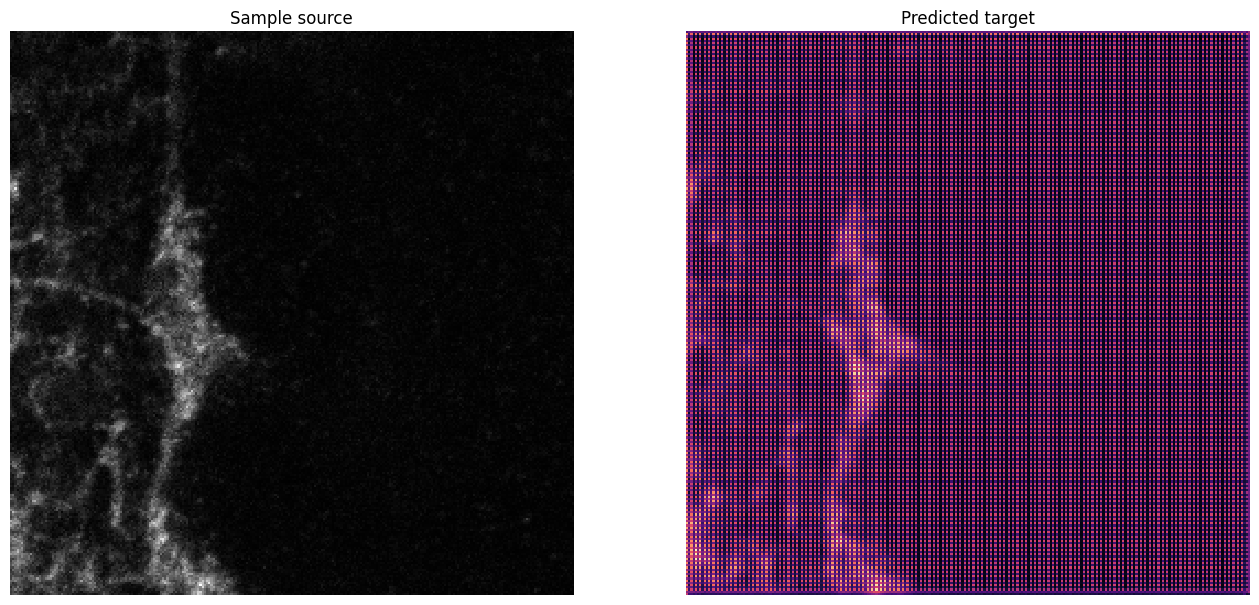

53/53 [==============================] - 533s 10s/step - loss: 9.0188e-05 - dice_coefficient: 1.7664e-04 - val_loss: 9.8841e-05 - val_dice_coefficient: 2.7600e-04
Epoch 2/10
53/53 [==============================] - ETA: 0s - loss: 1.4037e-04 - dice_coefficient: 5.3558e-04
Epoch 2: saving model to data/test_model/testmodel/ckpt/testmodel_epoch_02_val_loss_0.0002.hdf5


2024-12-19 13:22:45.545230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [3,256,256,8,1]
	 [[{{node Placeholder/_0}}]]


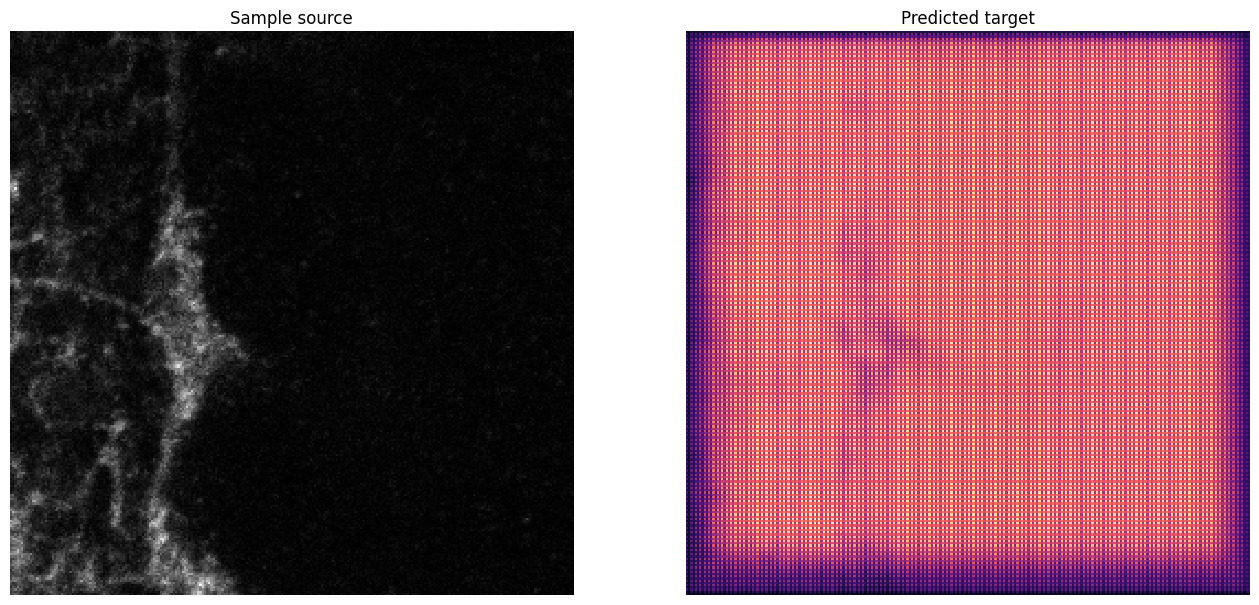

53/53 [==============================] - 520s 10s/step - loss: 1.4037e-04 - dice_coefficient: 5.3558e-04 - val_loss: 2.0817e-04 - val_dice_coefficient: 3.6891e-04
Epoch 3/10
53/53 [==============================] - ETA: 0s - loss: 8.8861e-05 - dice_coefficient: 3.7606e-04
Epoch 3: saving model to data/test_model/testmodel/ckpt/testmodel_epoch_03_val_loss_0.0004.hdf5


2024-12-19 13:31:23.830645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [3,256,256,8,1]
	 [[{{node Placeholder/_0}}]]


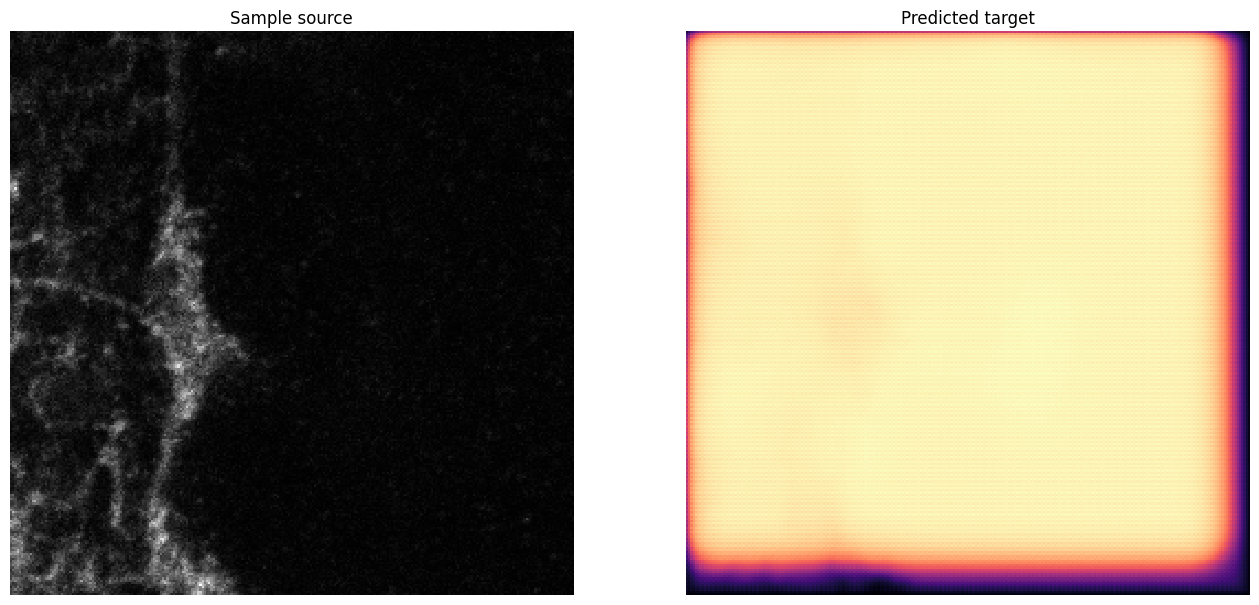

53/53 [==============================] - 518s 10s/step - loss: 8.8861e-05 - dice_coefficient: 3.7606e-04 - val_loss: 4.1416e-04 - val_dice_coefficient: 7.2817e-05
Epoch 4/10
53/53 [==============================] - ETA: 0s - loss: 9.1195e-05 - dice_coefficient: 4.3733e-04
Epoch 4: saving model to data/test_model/testmodel/ckpt/testmodel_epoch_04_val_loss_0.0001.hdf5


2024-12-19 13:40:07.754482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [3,256,256,8,1]
	 [[{{node Placeholder/_0}}]]


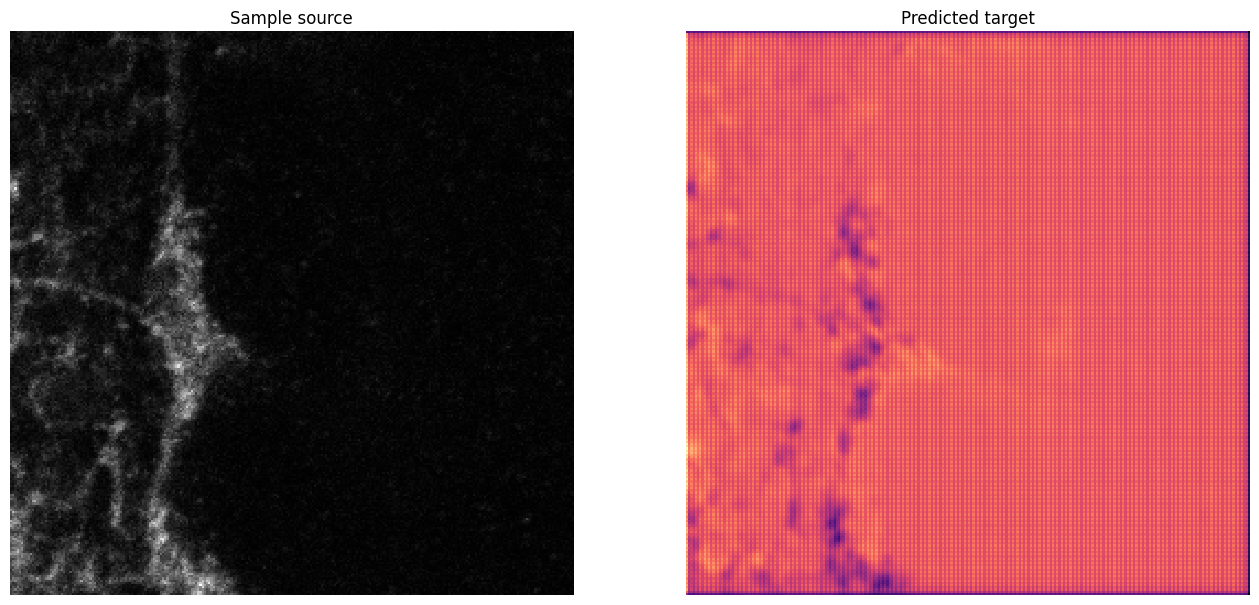

53/53 [==============================] - 523s 10s/step - loss: 9.1195e-05 - dice_coefficient: 4.3733e-04 - val_loss: 1.2140e-04 - val_dice_coefficient: 4.7893e-04
Epoch 5/10
53/53 [==============================] - ETA: 0s - loss: 1.1804e-04 - dice_coefficient: 5.5607e-04
Epoch 5: saving model to data/test_model/testmodel/ckpt/testmodel_epoch_05_val_loss_0.0001.hdf5


2024-12-19 13:48:48.594134: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [3,256,256,8,1]
	 [[{{node Placeholder/_0}}]]


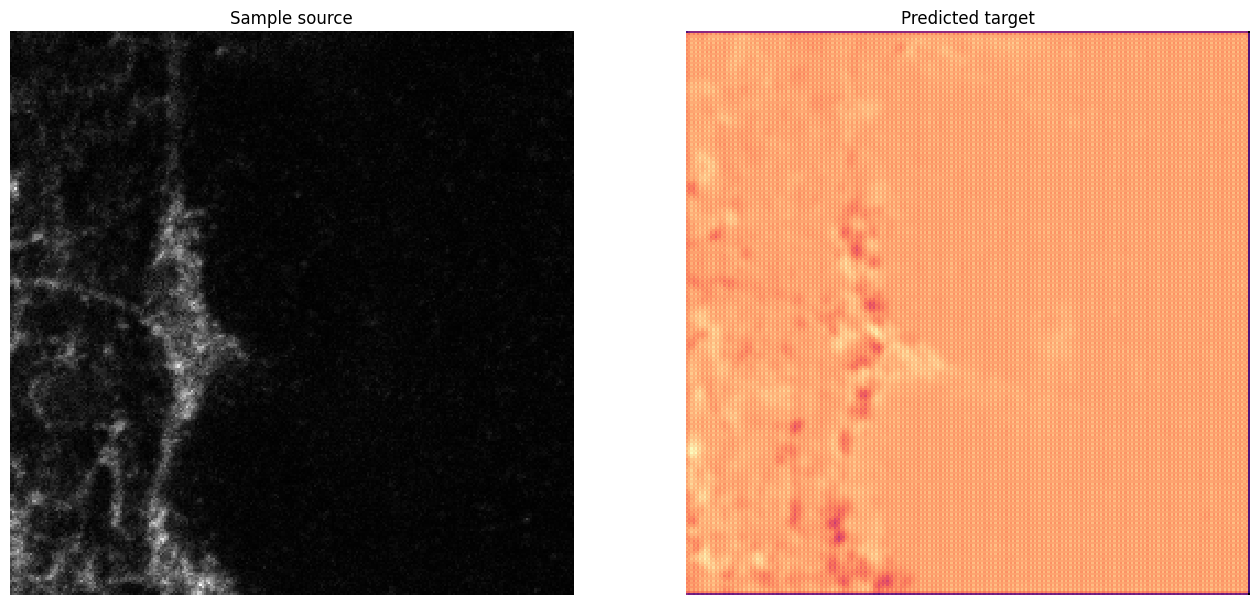

53/53 [==============================] - 520s 10s/step - loss: 1.1804e-04 - dice_coefficient: 5.5607e-04 - val_loss: 1.3105e-04 - val_dice_coefficient: 4.3006e-04
Epoch 6/10
53/53 [==============================] - ETA: 0s - loss: 9.7244e-05 - dice_coefficient: 6.3484e-04
Epoch 6: saving model to data/test_model/testmodel/ckpt/testmodel_epoch_06_val_loss_0.0000.hdf5


2024-12-19 13:57:31.986971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [3,256,256,8,1]
	 [[{{node Placeholder/_0}}]]


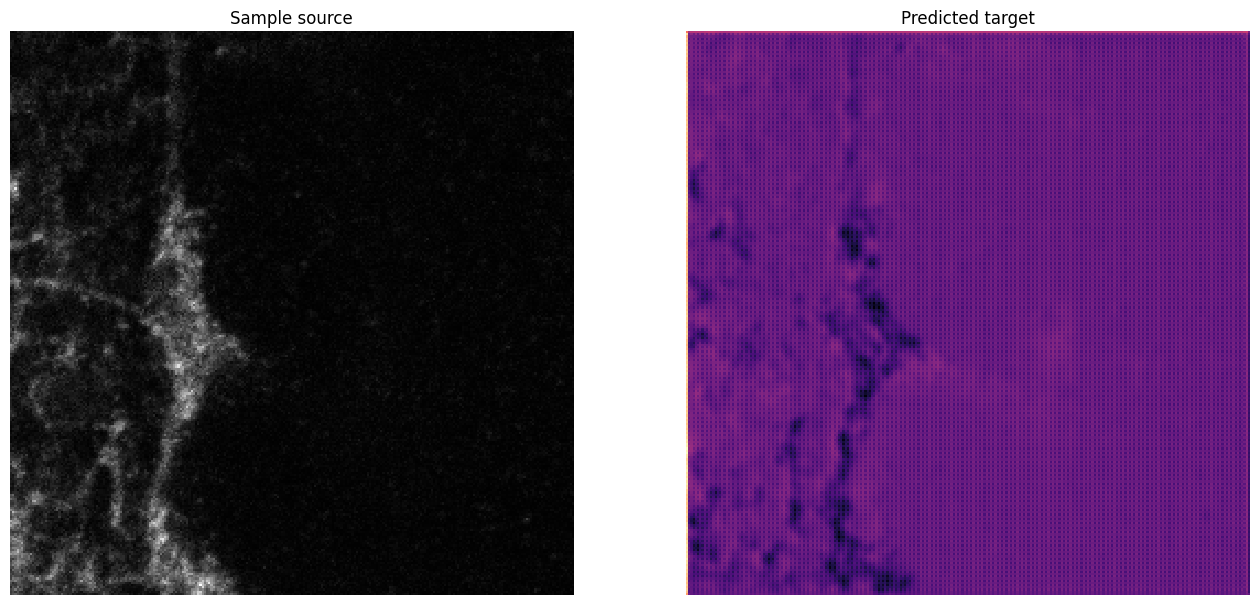

53/53 [==============================] - 523s 10s/step - loss: 9.7244e-05 - dice_coefficient: 6.3484e-04 - val_loss: 2.6944e-05 - val_dice_coefficient: 0.0000e+00
Epoch 7/10
53/53 [==============================] - ETA: 0s - loss: 9.0716e-05 - dice_coefficient: 4.1962e-04  
Epoch 7: saving model to data/test_model/testmodel/ckpt/testmodel_epoch_07_val_loss_0.0002.hdf5


2024-12-19 15:08:44.725984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [3,256,256,8,1]
	 [[{{node Placeholder/_0}}]]


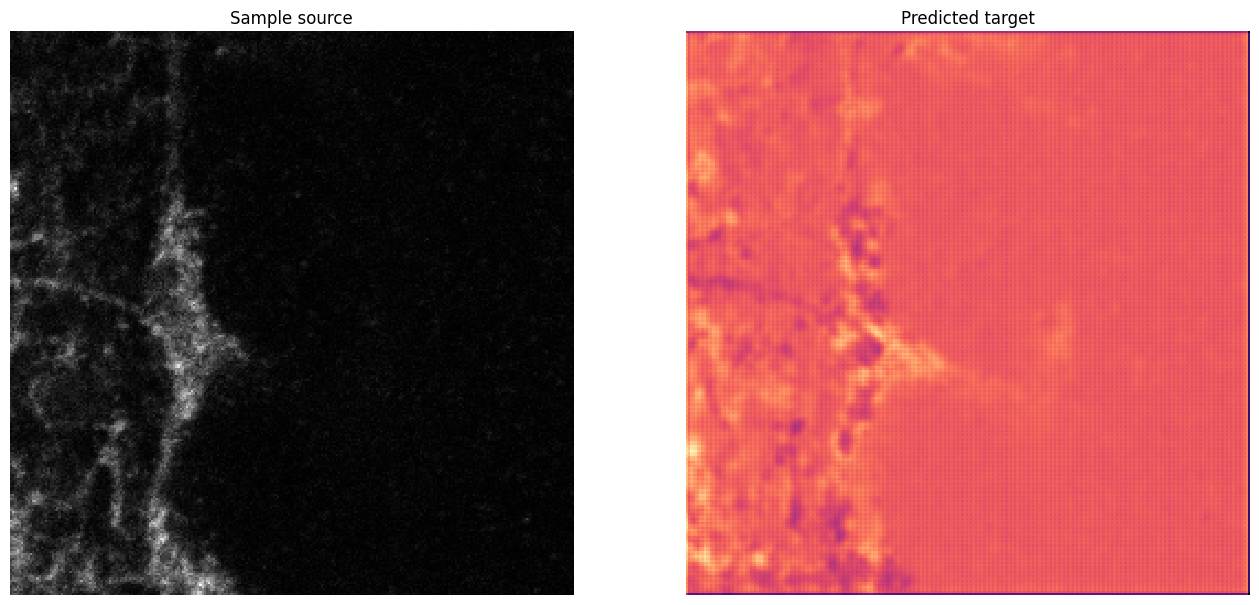

53/53 [==============================] - 4273s 82s/step - loss: 9.0716e-05 - dice_coefficient: 4.1962e-04 - val_loss: 2.3184e-04 - val_dice_coefficient: 0.0010
Epoch 8/10
12/53 [=====>........................] - ETA: 8:18 - loss: 1.1079e-04 - dice_coefficient: 6.9999e-04

In [ ]:
# Run this cell to execute the code
internal_aux_initial_time=datetime.now()
print('Runnning...')
print('--------------------------------------')

#here we check that no model with the same name already exist, if so delete
if not resume_training and os.path.exists(full_model_path): 
    shutil.rmtree(full_model_path)
    print(bcolors.WARNING+'!! WARNING: Folder already exists and has been overwritten !!'+bcolors.NORMAL) 

if not os.path.exists(full_model_path):
    os.makedirs(full_model_path)

pdf_export(augmentation = apply_data_augmentation, pretrained_model = resume_training)

# Save file
params_df.to_csv(os.path.join(full_model_path, 'params.csv'))

start = time.time()
# Start Training
model.train(epochs=number_of_epochs,
            batch_size=batch_size,
            train_generator=train_generator,
            val_generator=val_generator,
            model_path=model_path,
            model_name=model_name,
            loss=loss_function,
            metrics=metrics,
            optimizer=optimizer,
            learning_rate=learning_rate,
            ckpt_period=checkpointing_period,
            save_best_ckpt_only=save_best_only,
            ckpt_path=last_ckpt_path)

print('Training successfully completed!')
dt = time.time() - start
mins, sec = divmod(dt, 60) 
hour, mins = divmod(mins, 60) 
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")

#Create a pdf document with training summary

pdf_export(trained = True, augmentation = apply_data_augmentation, pretrained_model = resume_training)
print('--------------------------------------')
print(f'Finnished. Duration: {datetime.now() - internal_aux_initial_time}')

## **3.2. Download your model from Google Drive**

---
<font size = 4>Once training is complete, the trained model is automatically saved to your Google Drive, in the **`model_path`** folder that was specified in Section 3. Download the folder to avoid any unwanted surprises, since the data can be erased if you train another model using the same `model_path`.


In [ ]:
# Run this cell to visualize the parameters and click the button to execute the code
internal_aux_initial_time=datetime.now()
clear_output()

display(Markdown("## Download model directory"))
display(Markdown(" 1.  <font size = 4>Specify the model_path in `model_path_download` otherwise the model sepcified in Section 3.1 will be downloaded"))
display(Markdown(" 2.  <font size = 4>Run this cell to zip the model directory"))
display(Markdown(" 3.  <font size = 4>Download the zipped file from the *Files* tab on the left"))
widget_model_path_download = widgets.Text(value="", style={'description_width': 'initial'}, description="model_path_download:")
display(widget_model_path_download)

def function_16(output_widget):
  output_widget.clear_output()
  with output_widget:
    global model_path_download

    global model_path_download
    global model_name_download
    global zip_model_path

    from google.colab import files
    
    model_path_download = widget_model_path_download.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_16_model_path_download', widget_model_path_download.value)
    
    if len(model_path_download) == 0:
        model_path_download = full_model_path
    
    model_name_download = os.path.basename(model_path_download)
    
    print('Zipping', model_name_download)
    
    zip_model_path = model_name_download + '.zip'
    
    !zip -r "$zip_model_path" "$model_path_download"
    
    print('Successfully saved zipped model directory as', zip_model_path)
    
    plt.show()

def function_16_cache(output_widget):
    global model_path_download

    global model_path_download
    global model_name_download
    global zip_model_path

    cache_model_path_download = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_16_model_path_download')
    if cache_model_path_download != '':
        widget_model_path_download.value = cache_model_path_download
    
button_function_16 = widgets.Button(description='Load and run')
cache_button_function_16 = widgets.Button(description='Load prev. settings')
output_function_16 = widgets.Output()
display(widgets.HBox((button_function_16, cache_button_function_16)), output_function_16)
def aux_function_16(_):
  return function_16(output_function_16)

def aux_function_16_cache(_):
  return function_16_cache(output_function_16)

button_function_16.on_click(aux_function_16)
cache_button_function_16.on_click(aux_function_16_cache)
print('--------------------------------------------------------------')
print('^ Introduce the arguments and click "Load and run". ^')
print('^ Or first click "Load prev. settings" if any previous ^')
print('^ settings have been saved and then click "Load and run". ^')

# **4. Evaluate your model**
---

<font size = 4>In this section the newly trained model can be assessed for performance. This involves inspecting the loss function in Section 5.1. and employing more advanced metrics in Section 5.2.

<font size = 4>**We highly recommend performing quality control on all newly trained models.**




In [ ]:
# Run this cell to visualize the parameters and click the button to execute the code
internal_aux_initial_time=datetime.now()
clear_output()

display(Markdown("### Model to be evaluated:"))
display(Markdown(" <font size = 3>If left blank, the latest model defined in Section 3 will be evaluated:"))
widget_qc_model_name = widgets.Text(value="", style={'description_width': 'initial'}, description="qc_model_name:")
display(widget_qc_model_name)
widget_qc_model_path = widgets.Text(value="", style={'description_width': 'initial'}, description="qc_model_path:")
display(widget_qc_model_path)

def function_18(output_widget):
  output_widget.clear_output()
  with output_widget:
    global qc_model_name
    global qc_model_path

    global qc_model_name
    global qc_model_path
    global full_qc_model_path
    global W
    global R

    qc_model_name = widget_qc_model_name.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_18_qc_model_name', widget_qc_model_name.value)
    qc_model_path = widget_qc_model_path.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_18_qc_model_path', widget_qc_model_path.value)
    
    if len(qc_model_path) == 0 and len(qc_model_name) == 0:
        qc_model_name = model_name
        qc_model_path = model_path
    
    full_qc_model_path = os.path.join(qc_model_path, qc_model_name)
    
    if os.path.exists(full_qc_model_path):
        print(qc_model_name + ' will be evaluated')
    else:
        W  = '\033[0m'  # white (normal)
        R  = '\033[31m' # red
        print(R+'!! WARNING: The chosen model does not exist !!'+W)
        print('Please make sure you provide a valid model path and model name before proceeding further.')
    
    plt.show()

def function_18_cache(output_widget):
    global qc_model_name
    global qc_model_path

    global qc_model_name
    global qc_model_path
    global full_qc_model_path
    global W
    global R

    cache_qc_model_name = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_18_qc_model_name')
    if cache_qc_model_name != '':
        widget_qc_model_name.value = cache_qc_model_name
    
    cache_qc_model_path = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_18_qc_model_path')
    if cache_qc_model_path != '':
        widget_qc_model_path.value = cache_qc_model_path
    
button_function_18 = widgets.Button(description='Load and run')
cache_button_function_18 = widgets.Button(description='Load prev. settings')
output_function_18 = widgets.Output()
display(widgets.HBox((button_function_18, cache_button_function_18)), output_function_18)
def aux_function_18(_):
  return function_18(output_function_18)

def aux_function_18_cache(_):
  return function_18_cache(output_function_18)

button_function_18.on_click(aux_function_18)
cache_button_function_18.on_click(aux_function_18_cache)
print('--------------------------------------------------------------')
print('^ Introduce the arguments and click "Load and run". ^')
print('^ Or first click "Load prev. settings" if any previous ^')
print('^ settings have been saved and then click "Load and run". ^')

## **4.1. Inspecting loss function**
---

<font size = 4>**The training loss** is the error between prediction and target after each epoch calculated across the training data while the **validation loss** calculates the error on the (unseen) validation data. During training these values should decrease until converging at which point the model has been sufficiently trained. If the validation loss starts increasing while the training loss has plateaued, the model has overfit on the training data which reduces its ability to generalise. Aim to halt training before this point.

<font size = 4>**Note:** For a more in-depth explanation please refer to [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols et al.


<font size = 4>The accuracy is another performance metric that is calculated after each epoch. We use the [Sørensen–Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient) to score the prediction accuracy. 




In [ ]:
# Run this cell to execute the code
internal_aux_initial_time=datetime.now()
print('Runnning...')
print('--------------------------------------')
lossDataFromCSV = []
vallossDataFromCSV = []
accuracyDataFromCSV = []
valaccuracyDataFromCSV = []

with open(full_qc_model_path + '/Quality Control/training_evaluation.csv', 'r') as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[2]))
        vallossDataFromCSV.append(float(row[4]))
        accuracyDataFromCSV.append(float(row[1]))
        valaccuracyDataFromCSV.append(float(row[3]))

epochNumber = range(len(lossDataFromCSV))
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
plt.plot(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training and validation loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.legend()

plt.subplot(2,1,2)
plt.plot(epochNumber,accuracyDataFromCSV, label='Training accuracy')
plt.plot(epochNumber,valaccuracyDataFromCSV, label='Validation accuracy')
plt.title('Training and validation accuracy', fontsize=14)
plt.ylabel('Dice', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.legend()
plt.savefig(full_qc_model_path + '/Quality Control/lossCurvePlots.png', bbox_inches='tight', pad_inches=0)
plt.show()

print('--------------------------------------')
print(f'Finnished. Duration: {datetime.now() - internal_aux_initial_time}')

## **4.2. Error mapping and quality metrics estimation**
---
<font size = 4>This section will provide both a visual indication of the model performance by comparing the overlay of the predicted and source volume.


In [ ]:
# Run this cell to visualize the parameters and click the button to execute the code
internal_aux_initial_time=datetime.now()
clear_output()

display(Markdown("## Compare prediction and ground-truth on testing data"))
display(Markdown(" <font size = 4>Provide an unseen annotated dataset to determine the performance of the model:"))
widget_testing_source = widgets.Text(value="", style={'description_width': 'initial'}, description="testing_source:")
display(widget_testing_source)
widget_testing_target = widgets.Text(value="", style={'description_width': 'initial'}, description="testing_target:")
display(widget_testing_target)

def function_22(output_widget):
  output_widget.clear_output()
  with output_widget:
    global testing_source
    global testing_target

    global qc_dir
    global predict_dir
    global predict_path
    global ckpt_dir_list
    global last_ckpt_path
    global params
    global model
    global prediction
    global downscaling
    global true_patch_size
    global qc_metrics_path
    global test_target
    global test_source
    global test_prediction

    global last_chars
    global scroll_in_z

    testing_source = widget_testing_source.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_22_testing_source', widget_testing_source.value)
    testing_target = widget_testing_target.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_22_testing_target', widget_testing_target.value)
    
    qc_dir = full_qc_model_path + '/Quality Control'
    predict_dir = qc_dir + '/Prediction'
    if os.path.exists(predict_dir):
        shutil.rmtree(predict_dir)
    
    os.makedirs(predict_dir)
    
    # predict_dir + '/' + 
    predict_path = os.path.splitext(os.path.basename(testing_source))[0] + '_prediction.tif'
    
    def last_chars(x):
        return(x[-11:])
    
    try:
        ckpt_dir_list = glob(full_qc_model_path + '/ckpt/*')
        ckpt_dir_list.sort(key=last_chars)
        last_ckpt_path = ckpt_dir_list[0]
        print('Predicting from checkpoint:', os.path.basename(last_ckpt_path))
    except IndexError:
        raise CheckpointError('No previous checkpoints were found, please retrain model.')
    
    # Load parameters
    params = pd.read_csv(os.path.join(full_qc_model_path, 'params.csv'), names=['val'], header=0, index_col=0)   
    
    model = Unet3D(shape=params.loc['training_shape', 'val'])
    
    prediction = model.predict(testing_source, last_ckpt_path, 
                               downscaling=params.loc['downscaling', 'val'],
                               true_patch_size=params.loc['true_patch_size', 'val'])
    
    tifffile.imwrite(predict_path, prediction.astype('float32'), imagej=True)
    
    print('Predicted images!')
    
    qc_metrics_path = full_qc_model_path + '/Quality Control/QC_metrics_' + qc_model_name + '.csv'
    
    test_target = tifffile.imread(testing_target)
    test_source = tifffile.imread(testing_source)
    test_prediction = tifffile.imread(predict_path)
    
    def scroll_in_z(z):
    
        plt.figure(figsize=(25,5))
        # Source
        plt.subplot(1,4,1)
        plt.axis('off')
        plt.imshow(test_source[z-1], cmap='gray')
        plt.title('Source (z = ' + str(z) + ')', fontsize=15)
    
        # Target (Ground-truth)
        plt.subplot(1,4,2)
        plt.axis('off')
        plt.imshow(test_target[z-1], cmap='magma')
        plt.title('Target (z = ' + str(z) + ')', fontsize=15)
    
        # Prediction
        plt.subplot(1,4,3)
        plt.axis('off')
        plt.imshow(test_prediction[z-1], cmap='magma')
        plt.title('Prediction (z = ' + str(z) + ')', fontsize=15)
        
        # Overlay
        plt.subplot(1,4,4)
        plt.axis('off')
        plt.imshow(test_target[z-1], cmap='Greens')
        plt.imshow(test_prediction[z-1], alpha=0.5, cmap='Purples')
        plt.title('Overlay (z = ' + str(z) + ')', fontsize=15)
        plt.savefig(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/QC_example_data.png', bbox_inches='tight', pad_inches=0)
    interact(scroll_in_z, z=widgets.IntSlider(min=1, max=test_source.shape[0], step=1, value=0));
    
    plt.show()

def function_22_cache(output_widget):
    global testing_source
    global testing_target

    global qc_dir
    global predict_dir
    global predict_path
    global ckpt_dir_list
    global last_ckpt_path
    global params
    global model
    global prediction
    global downscaling
    global true_patch_size
    global qc_metrics_path
    global test_target
    global test_source
    global test_prediction

    global last_chars
    global scroll_in_z

    cache_testing_source = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_22_testing_source')
    if cache_testing_source != '':
        widget_testing_source.value = cache_testing_source
    
    cache_testing_target = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_22_testing_target')
    if cache_testing_target != '':
        widget_testing_target.value = cache_testing_target
    
button_function_22 = widgets.Button(description='Load and run')
cache_button_function_22 = widgets.Button(description='Load prev. settings')
output_function_22 = widgets.Output()
display(widgets.HBox((button_function_22, cache_button_function_22)), output_function_22)
def aux_function_22(_):
  return function_22(output_function_22)

def aux_function_22_cache(_):
  return function_22_cache(output_function_22)

button_function_22.on_click(aux_function_22)
cache_button_function_22.on_click(aux_function_22_cache)
print('--------------------------------------------------------------')
print('^ Introduce the arguments and click "Load and run". ^')
print('^ Or first click "Load prev. settings" if any previous ^')
print('^ settings have been saved and then click "Load and run". ^')

## **4.3. Determine best Intersection over Union and threshold**
---

<font size = 4>**Note:** This section is only relevant if the target image is a binary mask and `binary_target` is selected in Section 3!  

<font size = 4>This section will provide both a visual and a quantitative indication of the model performance by comparing the overlay of the predicted and source volume, as well as computing the highest [**Intersection over Union**](https://en.wikipedia.org/wiki/Jaccard_index) (IoU) score. The IoU is also known as the Jaccard Index.  

<font size = 4>The best threshold is calculated using the IoU. Each threshold value from 0 to 255 is tested and the threshold with the highest score is deemed the best. The IoU is calculated for the entire volume in 3D.


In [ ]:
# Run this cell to execute the code
internal_aux_initial_time=datetime.now()
print('Runnning...')
print('--------------------------------------')

prediction = tifffile.imread(predict_path)
prediction = np.interp(prediction, (prediction.min(), prediction.max()), (0, 255))

target = tifffile.imread(testing_target).astype(np.bool)

def iou_vs_threshold(prediction, target):
    threshold_list = []
    IoU_scores_list = []

    for threshold in range(0,256): 
        mask = prediction > threshold

        intersection = np.logical_and(target, mask)
        union = np.logical_or(target, mask)
        iou_score = np.sum(intersection) / np.sum(union)

        threshold_list.append(threshold)
        IoU_scores_list.append(iou_score)

    return threshold_list, IoU_scores_list

threshold_list, IoU_scores_list = iou_vs_threshold(prediction, target)
thresh_arr = np.array(list(zip(threshold_list, IoU_scores_list)))
best_thresh = int(np.where(thresh_arr == np.max(thresh_arr[:,1]))[0])
best_iou = IoU_scores_list[best_thresh]

print('Highest IoU is {:.4f} with a threshold of {}'.format(best_iou, best_thresh))

def adjust_threshold(threshold, z):

    f=plt.figure(figsize=(25,5))
    plt.subplot(1,4,1)
    plt.imshow((prediction[z-1] > threshold).astype('uint8'), cmap='magma')
    plt.title('Prediction (Threshold = ' + str(threshold) + ')', fontsize=15)
    plt.axis('off')

    plt.subplot(1,4,2)
    plt.imshow(target[z-1], cmap='magma')
    plt.title('Target (z = ' + str(z) + ')', fontsize=15)
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.axis('off')
    plt.imshow(test_source[z-1], cmap='gray')
    plt.imshow((prediction[z-1] > threshold).astype('uint8'), alpha=0.4, cmap='Reds')
    plt.title('Overlay (z = ' + str(z) + ')', fontsize=15)

    plt.subplot(1,4,4)
    plt.title('Threshold vs. IoU', fontsize=15)
    plt.plot(threshold_list, IoU_scores_list)
    plt.plot(threshold, IoU_scores_list[threshold], 'ro')     
    plt.ylabel('IoU score')
    plt.xlabel('Threshold')
    plt.savefig(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/QC_IoU_analysis.png',bbox_inches=matplotlib.transforms.Bbox([[17.5,0],[23,5]]),pad_inches=0)
    plt.show()

interact(adjust_threshold, 
         threshold=widgets.IntSlider(min=0, max=255, step=1, value=best_thresh),
         z=widgets.IntSlider(min=1, max=prediction.shape[0], step=1, value=0));

#Make a pdf summary of the QC results

qc_pdf_export()

print('--------------------------------------')
print(f'Finnished. Duration: {datetime.now() - internal_aux_initial_time}')

## **4.4. Export your model into the BioImage Model Zoo format**
---
<font size = 4>This section exports the model into the [BioImage Model Zoo](https://bioimage.io/#/) format so it can be used directly with deepImageJ or Ilastik. The new files will be stored in the model folder specified at the beginning of Section 5. 

<font size = 4>Once the cell is executed, you will find a new zip file with the name specified in `trained_model_name.bioimage.io.model`.

<font size = 4>To use it with deepImageJ, download it and install it suing DeepImageJ Install Model > Install from a local file. 

<font size = 4>To try the model in ImageJ, go to Plugins > DeepImageJ > DeepImageJ Run, choose this model from the list and click on Test Model.

<font size = 4>  More information at https://deepimagej.github.io/deepimagej/


In [ ]:
# Run this cell to visualize the parameters and click the button to execute the code
internal_aux_initial_time=datetime.now()
clear_output()

display(Markdown("## Introduce the information to document your model:"))
widget_Trained_model_name = widgets.Text(value="Name of your model", style={'description_width': 'initial'}, description="Trained_model_name:")
display(widget_Trained_model_name)
widget_Trained_model_authors = widgets.Text(value="[Author 1 name, Author 2 name]", style={'description_width': 'initial'}, description="Trained_model_authors:")
display(widget_Trained_model_authors)
widget_Trained_model_authors_affiliation = widgets.Text(value="[Author affiliation, Author 2 affiliation]", style={'description_width': 'initial'}, description="Trained_model_authors_affiliation:")
display(widget_Trained_model_authors_affiliation)
widget_Trained_model_description = widgets.Text(value="A 3D U-Net trained using ZeroCostDL4Mic to segment mitochondria in 3D transmission electron microscopy images of the CA1 hippocampus region.", style={'description_width': 'initial'}, description="Trained_model_description:")
display(widget_Trained_model_description)
widget_Trained_model_license = widgets.Text(value='MIT', style={'description_width': 'initial'}, description="Trained_model_license:")
display(widget_Trained_model_license)
display(Markdown("## Include information about training data (optional):"))
widget_include_training_data = widgets.Checkbox(value=True, style={'description_width': 'initial'}, description="include_training_data:")
display(widget_include_training_data)
display(Markdown("### - If it is published in the BioImage Model Zoo, please, provide the ID"))
widget_data_from_bioimage_model_zoo = widgets.Checkbox(value=False, style={'description_width': 'initial'}, description="data_from_bioimage_model_zoo:")
display(widget_data_from_bioimage_model_zoo)
widget_training_data_ID = widgets.Text(value='', style={'description_width': 'initial'}, description="training_data_ID:")
display(widget_training_data_ID)
display(Markdown("### - If not, please provide the URL tot he data and a short description"))
widget_training_data_source = widgets.Text(value='https://www.epfl.ch/labs/cvlab/data/data-em/', style={'description_width': 'initial'}, description="training_data_source:")
display(widget_training_data_source)
widget_training_data_description = widgets.Text(value='As said in the webpage, the dataset represents a section taken from the CA1 hippocampus region of the brain. The resolution of each voxel is approximately 5x5x5nm.', style={'description_width': 'initial'}, description="training_data_description:")
display(widget_training_data_description)
display(Markdown("## Choose if you want to threshold the network output and if you want to use the best threshold calculated before."))
widget_apply_threshold = widgets.Checkbox(value=True, style={'description_width': 'initial'}, description="apply_threshold:")
display(widget_apply_threshold)
widget_Use_The_Best_Average_Threshold = widgets.Checkbox(value=True, style={'description_width': 'initial'}, description="Use_The_Best_Average_Threshold:")
display(widget_Use_The_Best_Average_Threshold)
display(Markdown("### If not, please input:"))
widget_threshold = widgets.IntText(value=210, style={'description_width': 'initial'}, description="threshold:")
display(widget_threshold)
display(Markdown("## Introduce the voxel size (pixel size for each Z-slice and the distance between Z-slices) (in microns) of the image provided as an example of the model processing:"))
widget_PixelSize = widgets.IntText(value=1, style={'description_width': 'initial'}, description="PixelSize:")
display(widget_PixelSize)
widget_Zdistance = widgets.IntText(value=1, style={'description_width': 'initial'}, description="Zdistance:")
display(widget_Zdistance)
display(Markdown("## Do you want to choose the exampleimage?"))
widget_default_example_image = widgets.Checkbox(value=True, style={'description_width': 'initial'}, description="default_example_image:")
display(widget_default_example_image)
display(Markdown("### If not, please input:"))
widget_fileID = widgets.Text(value="", style={'description_width': 'initial'}, description="fileID:")
display(widget_fileID)

def function_26(output_widget):
  output_widget.clear_output()
  with output_widget:
    global Trained_model_name
    global Trained_model_authors
    global Trained_model_authors_affiliation
    global Trained_model_description
    global Trained_model_license
    global include_training_data
    global data_from_bioimage_model_zoo
    global training_data_ID
    global training_data_source
    global training_data_description
    global apply_threshold
    global Use_The_Best_Average_Threshold
    global threshold
    global PixelSize
    global Zdistance
    global default_example_image
    global fileID

    global Trained_model_references
    global Trained_model_DOI
    global threshold
    global threshold
    global fileID
    global ckpt_dir_list
    global last_ckpt_path
    global params
    global model
    global unet
    global input
    global single_output
    global unet
    global weight_path
    global auth_names
    global auth_affs
    global authors
    global license
    global output_root
    global output_path
    global readme_path
    global citations
    global training_data
    global training_data
    global training_data
    global min_percentile
    global max_percentile
    global shape
    global pixel_size
    global kwargs
    global input_names
    global input_axes
    global pixel_sizes
    global preprocessing
    global shape
    global postprocessing
    global postprocessing
    global output_spec
    global output_names
    global output_axes
    global postprocessing
    global output_reference
    global output_scale
    global output_offset
    global test_img
    global x_size
    global x_size
    global y_size
    global y_size
    global z_size
    global z_size
    global test_img
    global test_in_path
    global test_img
    global eps
    global n
    global d
    global test_img
    global test_img
    global test_prediction
    global n
    global d
    global test_prediction
    global test_prediction
    global test_prediction
    global test_prediction
    global test_out_path
    global qc_path
    global attachments
    global attachments
    global weight_uri
    global test_inputs
    global test_outputs
    global name
    global description
    global authors
    global tags
    global license
    global documentation
    global cite
    global output_path
    global add_deepimagej_config
    global tensorflow_version
    global attachments
    global training_data
    global tf_weight_path
    global res
    global success
    global success
    global res
    global success

    global last_chars

    # ------------- User input ------------
    # information about the model
    Trained_model_name = widget_Trained_model_name.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_Trained_model_name', widget_Trained_model_name.value)
    Trained_model_authors = widget_Trained_model_authors.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_Trained_model_authors', widget_Trained_model_authors.value)
    Trained_model_authors_affiliation = widget_Trained_model_authors_affiliation.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_Trained_model_authors_affiliation', widget_Trained_model_authors_affiliation.value)
    Trained_model_description = widget_Trained_model_description.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_Trained_model_description', widget_Trained_model_description.value)
    Trained_model_license = widget_Trained_model_license.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_Trained_model_license', widget_Trained_model_license.value)
    Trained_model_references = ["Falk et al. Nature Methods 2019", "Ronneberger et al. arXiv in 2015", "Lucas von Chamier et al. biorXiv 2020"] 
    Trained_model_DOI = ["https://doi.org/10.1038/s41592-018-0261-2","https://doi.org/10.1007/978-3-319-24574-4_28", "https://doi.org/10.1101/2020.03.20.000133"] 
    
    # Training data
    # ---------------------------------------
    include_training_data = widget_include_training_data.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_include_training_data', widget_include_training_data.value)
    data_from_bioimage_model_zoo = widget_data_from_bioimage_model_zoo.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_data_from_bioimage_model_zoo', widget_data_from_bioimage_model_zoo.value)
    training_data_ID = widget_training_data_ID.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_training_data_ID', widget_training_data_ID.value)
    training_data_source = widget_training_data_source.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_training_data_source', widget_training_data_source.value)
    training_data_description = widget_training_data_description.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_training_data_description', widget_training_data_description.value)
    
    # Add example image information
    # ---------------------------------------
    apply_threshold = widget_apply_threshold.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_apply_threshold', widget_apply_threshold.value)
    Use_The_Best_Average_Threshold = widget_Use_The_Best_Average_Threshold.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_Use_The_Best_Average_Threshold', widget_Use_The_Best_Average_Threshold.value)
    threshold = widget_threshold.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_threshold', widget_threshold.value)
    if Use_The_Best_Average_Threshold:
        threshold = best_thresh
    ## project it into the (0,1) range to operate with it in the bioimageio.core
    threshold = float(threshold) / 255
    
    # information about the example image
    PixelSize = widget_PixelSize.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_PixelSize', widget_PixelSize.value)
    Zdistance = widget_Zdistance.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_Zdistance', widget_Zdistance.value)
    default_example_image = widget_default_example_image.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_default_example_image', widget_default_example_image.value)
    fileID = widget_fileID.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_26_fileID', widget_fileID.value)
    if default_example_image:
        fileID = testing_source
    
    # Load model parameters
    # ---------------------------------------
    def last_chars(x):
        return(x[-11:])
    try:
        ckpt_dir_list = glob(full_qc_model_path + '/ckpt/*')
        ckpt_dir_list.sort(key=last_chars)
        last_ckpt_path = ckpt_dir_list[0]
        print('Predicting from checkpoint:', os.path.basename(last_ckpt_path))
    except IndexError:
        raise CheckpointError('No previous checkpoints were found, please retrain model.')
    
    params = pd.read_csv(os.path.join(full_qc_model_path, 'params.csv'), names=['val'], header=0, index_col=0)   
    # Load the model and process the example image
    # ---------------------------------------
    model = Unet3D(shape=params.loc['training_shape', 'val'])
    model.model.load_weights(last_ckpt_path)
    # ------------- Execute bioimage model zoo configuration ------------
    # Create a model without compilation so it can be used in any other environment.
    unet = model.model
    input  = unet.input
    single_output = unet.output
    # remove the custom loss function from the model, so that it can be used outside of this notebook
    unet = Model(input, single_output)
    weight_path = os.path.join(full_qc_model_path, 'keras_weights.hdf5')
    unet.save(weight_path)
    
    # create the author spec input
    auth_names = Trained_model_authors[1:-1].split(",")
    auth_affs = Trained_model_authors_affiliation[1:-1].split(",")
    assert len(auth_names) == len(auth_affs)
    authors = [{"name": auth_name, "affiliation": auth_aff} for auth_name, auth_aff in zip(auth_names, auth_affs)]
    
    # I would recommend using CCBY-4 as licencese
    license = Trained_model_license
    
    # where to save the model
    output_root = os.path.join(full_qc_model_path, Trained_model_name + '.bioimage.io.model')
    os.makedirs(output_root, exist_ok=True)
    output_path = os.path.join(output_root, f"{Trained_model_name}.zip")
    
    # create a markdown readme with information
    readme_path = os.path.join(output_root, "README.md")
    with open(readme_path, "w") as f:
      f.write("Visit https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")
    
    # create the citation input spec
    assert len(Trained_model_DOI) == len(Trained_model_references)
    citations = [{'text': text, 'doi': doi} for text, doi in zip(Trained_model_references, Trained_model_DOI)]
    
    # create the training data
    if include_training_data:
        if data_from_bioimage_model_zoo:
          training_data = {"id": training_data_ID}
        else:
          training_data = {"source": training_data_source,
                           "description": training_data_description}
    else:
        training_data={}
    
    # create the input spec
    min_percentile = 0
    max_percentile = 100
    shape = [sh for sh in unet.input.shape]
    # batch should never be constrained
    assert shape[0] is None
    shape[0] = 1  # batch is set to 1 for bioimage.io
    assert all(sh is not None for sh in shape)  # make sure all other shapes are fixed
    pixel_size = {"x": PixelSize, "y": PixelSize, 'z': Zdistance}
    kwargs = dict(
      input_names=["input"],
      input_axes=["bxyzc"],
      pixel_sizes=[pixel_size],
      preprocessing=[[{"name": "scale_range", "kwargs": {"min_percentile": min_percentile, 
                                      "max_percentile": max_percentile, 
                                      "mode": "per_sample",
                                      "axes": "xyzc"}}]])
    
    shape = tuple(shape)
    
    if apply_threshold:
      print("The model output is thresholded")
      postprocessing = [[{"name": "scale_range", "kwargs": {"min_percentile": 0, 
                                      "max_percentile": 100, 
                                      "mode": "per_sample",
                                      "axes": "xyzc"}}, 
                         {"name": "binarize", "kwargs": {"threshold": threshold}}]]
    else:
      print("The model output is not thresholded")
      postprocessing = None
    
    output_spec = dict(
      output_names=["output"],
      output_axes=["bxyzc"],
      postprocessing=postprocessing,
      output_reference=["input"],
      output_scale=[5*[1]], # consider changing it if the input has more than one channel
      output_offset=[5*[0]]
    )
    kwargs.update(output_spec)
    
    # load the input image, crop it if necessary, and save as numpy file
    # The crop will be centered to get an image with some content.
    test_img = tifffile.imread(fileID).T  
    
    x_size = int(test_img.shape[0]/2)
    x_size = x_size-int(shape[1]/2)
    
    y_size = int(test_img.shape[1]/2)
    y_size = y_size-int(shape[2]/2)
    
    z_size = int(test_img.shape[2]/2)
    z_size = z_size-int(shape[3]/2)
    
    assert test_img.ndim == 3
    test_img = test_img[x_size : x_size + shape[1],
                        y_size : y_size + shape[2],
                        z_size : z_size + shape[3]]
    
    assert test_img.shape == shape[1:4], f"{test_img.shape}, {shape}"
    # Save the test image
    test_in_path = os.path.join(output_root, "test_input.npy")
    test_img = test_img.astype(np.float32)
    np.save(test_in_path, test_img[None, ..., None])  # add batch and channel axis
    # Normalize the image before adding batch and channel dimensions
    eps = 1e-6 # Same epsilon value as in the bioimageio.core library
    n = test_img - np.min(test_img)
    d = np.max(test_img) - np.min(test_img) + eps
    test_img = n/d
    test_img = test_img[None, ..., None]
    test_prediction = unet.predict(test_img)
    
    # run prediction on the input image and save the result as expected output
    if apply_threshold:
      # Normalise the values of the test image
    
      n = test_prediction - np.min(test_prediction)
      d = np.max(test_prediction) - np.min(test_prediction) + 1e-6
      test_prediction = n/d
    
      test_prediction = (np.squeeze(test_prediction) > threshold).astype(np.uint8)
    else:
      test_prediction = np.squeeze(test_prediction)
    assert test_prediction.ndim == 3
    test_prediction = test_prediction[None, ..., None]  # add batch and channel axis
    test_out_path = os.path.join(output_root, "test_output.npy")
    np.save(test_out_path, test_prediction)
    
    # attach the QC report to the model (if it exists)
    qc_path = os.path.join(full_qc_model_path, 'Quality Control', 'training_evaluation.csv')
    if os.path.exists(qc_path):
      attachments = {"files": [qc_path]}
    else:
      attachments = None
    
    # export the model with keras weihgts
    build_model(
        weight_uri=weight_path,
        test_inputs=[test_in_path],
        test_outputs=[test_out_path],
        name=Trained_model_name,
        description=Trained_model_description,
        authors=authors,
        tags=['zerocostdl4mic', 'deepimagej', 'segmentation', 'tem', 'unet'],
        license=license,
        documentation=readme_path,
        cite=citations,
        output_path=output_path,
        add_deepimagej_config=True,
        tensorflow_version=tf.__version__,
        attachments=attachments,
        training_data = training_data,
        **kwargs
    )
    
    # convert the keras weights to tensorflow and add them to the model
    tf_weight_path = os.path.join(full_qc_model_path, "tf_weights")
    # we need to make sure that the tf weight folder does not exist
    if os.path.exists(tf_weight_path):
      rmtree(tf_weight_path)
    convert_weights_to_tensorflow_saved_model_bundle(output_path, tf_weight_path + ".zip")
    add_weights(output_path, tf_weight_path + ".zip", output_path, tensorflow_version=tf.__version__)
    
    # check that the model works for keras and tensorflow 
    res = test_model(output_path, weight_format="keras_hdf5")
    success = True
    if res[-1]["error"] is not None:
      success = False
      print("test-model failed for keras weights:", res[-1]["error"])
      
    res = test_model(output_path, weight_format="tensorflow_saved_model_bundle")
    if res[-1]["error"] is not None:
      success = False
      print("test-model failed for tensorflow weights:", res[-1]["error"])
    
    if success:
      print("The bioimage.io model was successfully exported to", output_path)
    else:
      print("The bioimage.io model was exported to", output_path)
      print("Some tests of the model did not work! You can still download and test the model.")
      print("You can still download and test the model, but it may not work as expected.")
    
    plt.show()

def function_26_cache(output_widget):
    global Trained_model_name
    global Trained_model_authors
    global Trained_model_authors_affiliation
    global Trained_model_description
    global Trained_model_license
    global include_training_data
    global data_from_bioimage_model_zoo
    global training_data_ID
    global training_data_source
    global training_data_description
    global apply_threshold
    global Use_The_Best_Average_Threshold
    global threshold
    global PixelSize
    global Zdistance
    global default_example_image
    global fileID

    global Trained_model_references
    global Trained_model_DOI
    global threshold
    global threshold
    global fileID
    global ckpt_dir_list
    global last_ckpt_path
    global params
    global model
    global unet
    global input
    global single_output
    global unet
    global weight_path
    global auth_names
    global auth_affs
    global authors
    global license
    global output_root
    global output_path
    global readme_path
    global citations
    global training_data
    global training_data
    global training_data
    global min_percentile
    global max_percentile
    global shape
    global pixel_size
    global kwargs
    global input_names
    global input_axes
    global pixel_sizes
    global preprocessing
    global shape
    global postprocessing
    global postprocessing
    global output_spec
    global output_names
    global output_axes
    global postprocessing
    global output_reference
    global output_scale
    global output_offset
    global test_img
    global x_size
    global x_size
    global y_size
    global y_size
    global z_size
    global z_size
    global test_img
    global test_in_path
    global test_img
    global eps
    global n
    global d
    global test_img
    global test_img
    global test_prediction
    global n
    global d
    global test_prediction
    global test_prediction
    global test_prediction
    global test_prediction
    global test_out_path
    global qc_path
    global attachments
    global attachments
    global weight_uri
    global test_inputs
    global test_outputs
    global name
    global description
    global authors
    global tags
    global license
    global documentation
    global cite
    global output_path
    global add_deepimagej_config
    global tensorflow_version
    global attachments
    global training_data
    global tf_weight_path
    global res
    global success
    global success
    global res
    global success

    global last_chars

    cache_Trained_model_name = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_Trained_model_name')
    if cache_Trained_model_name != '':
        widget_Trained_model_name.value = cache_Trained_model_name
    
    cache_Trained_model_authors = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_Trained_model_authors')
    if cache_Trained_model_authors != '':
        widget_Trained_model_authors.value = cache_Trained_model_authors
    
    cache_Trained_model_authors_affiliation = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_Trained_model_authors_affiliation')
    if cache_Trained_model_authors_affiliation != '':
        widget_Trained_model_authors_affiliation.value = cache_Trained_model_authors_affiliation
    
    cache_Trained_model_description = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_Trained_model_description')
    if cache_Trained_model_description != '':
        widget_Trained_model_description.value = cache_Trained_model_description
    
    cache_Trained_model_license = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_Trained_model_license')
    if cache_Trained_model_license != '':
        widget_Trained_model_license.value = cache_Trained_model_license
    
    cache_include_training_data = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_include_training_data')
    if cache_include_training_data != '':
        widget_include_training_data.value = cache_include_training_data
    
    cache_data_from_bioimage_model_zoo = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_data_from_bioimage_model_zoo')
    if cache_data_from_bioimage_model_zoo != '':
        widget_data_from_bioimage_model_zoo.value = cache_data_from_bioimage_model_zoo
    
    cache_training_data_ID = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_training_data_ID')
    if cache_training_data_ID != '':
        widget_training_data_ID.value = cache_training_data_ID
    
    cache_training_data_source = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_training_data_source')
    if cache_training_data_source != '':
        widget_training_data_source.value = cache_training_data_source
    
    cache_training_data_description = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_training_data_description')
    if cache_training_data_description != '':
        widget_training_data_description.value = cache_training_data_description
    
    cache_apply_threshold = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_apply_threshold')
    if cache_apply_threshold != '':
        widget_apply_threshold.value = cache_apply_threshold
    
    cache_Use_The_Best_Average_Threshold = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_Use_The_Best_Average_Threshold')
    if cache_Use_The_Best_Average_Threshold != '':
        widget_Use_The_Best_Average_Threshold.value = cache_Use_The_Best_Average_Threshold
    
    cache_threshold = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_threshold')
    if cache_threshold != '':
        widget_threshold.value = cache_threshold
    
    cache_PixelSize = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_PixelSize')
    if cache_PixelSize != '':
        widget_PixelSize.value = cache_PixelSize
    
    cache_Zdistance = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_Zdistance')
    if cache_Zdistance != '':
        widget_Zdistance.value = cache_Zdistance
    
    cache_default_example_image = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_default_example_image')
    if cache_default_example_image != '':
        widget_default_example_image.value = cache_default_example_image
    
    cache_fileID = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_26_fileID')
    if cache_fileID != '':
        widget_fileID.value = cache_fileID
    
button_function_26 = widgets.Button(description='Load and run')
cache_button_function_26 = widgets.Button(description='Load prev. settings')
output_function_26 = widgets.Output()
display(widgets.HBox((button_function_26, cache_button_function_26)), output_function_26)
def aux_function_26(_):
  return function_26(output_function_26)

def aux_function_26_cache(_):
  return function_26_cache(output_function_26)

button_function_26.on_click(aux_function_26)
cache_button_function_26.on_click(aux_function_26_cache)
print('--------------------------------------------------------------')
print('^ Introduce the arguments and click "Load and run". ^')
print('^ Or first click "Load prev. settings" if any previous ^')
print('^ settings have been saved and then click "Load and run". ^')

# **5. Using the trained model**

---

<font size = 4>Once sufficient performance of the trained model has been established using Section 5, the network can be used to segment unseen volumetric data.


## **5.1. Generate predictions from unseen dataset**
---

<font size = 4>The most recently trained model can now be used to predict segmentation masks on unseen images. If you want to use an older model, leave `model_path`  blank. Predicted output images are saved in `output_path` as Image-J compatible TIFF files.

## **Prediction parameters**

* <font size = 4>**`source_path`** specifies the location of the source 
image volume.

* <font size = 4>**`output_directory`** specified the directory where the output predictions are stored.

* <font size = 4>**`binary_target`** should be chosen if the network is trained to predict binary segmentation masks.

* <font size = 4>**`threshold`** can be calculated in Section 5 and is used to generate binary masks from the predictions.

* <font size = 4>**`big_tiff`** should be chosen if the expected prediction exceeds 4GB. The predictions will be saved using the BigTIFF format. Beware that this might substantially reduce the prediction speed. *Default: False* 

* <font size = 4>**`prediction_depth`** is only relevant if the prediction is saved as a BigTIFF. The prediction will not be performed in one go to not deplete the memory resources. Instead, the prediction is iteratively performed on a subset of the entire volume  with shape `(source.shape[0], source.shape[1], prediction_depth)`. *Default: 32*

* <font size = 4>**`model_path`** specifies the path to a model other than the most  recently trained.


In [ ]:
# Run this cell to execute the code
internal_aux_initial_time=datetime.now()
print('Runnning...')
print('--------------------------------------')

import requests  
import os
from tqdm.notebook import tqdm 

def download_from_url(url, save_as):
    file_url = url
    r = requests.get(file_url, stream=True)  
  
    with open(save_as, 'wb') as file:  
        for block in tqdm(r.iter_content(chunk_size = 1024), desc = 'Downloading ' + os.path.basename(save_as), total=3275073, ncols=1000):
            if block:
                file.write(block)  

download_from_url('https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/volumedata.tif', 'example_dataset/volumedata.tif')
print('--------------------------------------')
print(f'Finnished. Duration: {datetime.now() - internal_aux_initial_time}')

In [ ]:
# Run this cell to visualize the parameters and click the button to execute the code
internal_aux_initial_time=datetime.now()
clear_output()

display(Markdown("### Provide the path to your dataset and to the folder where the predictions are saved, then run the cell to predict outputs from your unseen images."))
widget_source_path = widgets.Text(value="", style={'description_width': 'initial'}, description="source_path:")
display(widget_source_path)
widget_output_directory = widgets.Text(value="", style={'description_width': 'initial'}, description="output_directory:")
display(widget_output_directory)
display(Markdown("### Prediction parameters:"))
widget_binary_target = widgets.Checkbox(value=True, style={'description_width': 'initial'}, description="binary_target:")
display(widget_binary_target)
widget_save_probability_map = widgets.Checkbox(value=False, style={'description_width': 'initial'}, description="save_probability_map:")
display(widget_save_probability_map)
display(Markdown(" <font size = 3>Determine best threshold in Section 5.2."))
widget_use_calculated_threshold = widgets.Checkbox(value=True, style={'description_width': 'initial'}, description="use_calculated_threshold:")
display(widget_use_calculated_threshold)
widget_threshold = widgets.IntText(value=200, style={'description_width': 'initial'}, description="threshold:")
display(widget_threshold)
display(Markdown(" <font size = 3>Choose if prediction file exceeds 4GB or if input file is very large (above 2GB). Image volume saved as BigTIFF."))
widget_big_tiff = widgets.Checkbox(value=False, style={'description_width': 'initial'}, description="big_tiff:")
display(widget_big_tiff)
display(Markdown(" <font size = 3>Reduce `prediction_depth` if runtime runs out of memory during prediction. Only relevant if prediction saved as BigTIFF"))
widget_prediction_depth = widgets.IntText(value=32, style={'description_width': 'initial'}, description="prediction_depth:")
display(widget_prediction_depth)
display(Markdown("### Model to be evaluated"))
display(Markdown(" <font size = 3>If left blank, the latest model defined in Section 5 will be evaluated"))
widget_full_model_path_ = widgets.Text(value="", style={'description_width': 'initial'}, description="full_model_path_:")
display(widget_full_model_path_)

def function_30(output_widget):
  output_widget.clear_output()
  with output_widget:
    global source_path
    global output_directory
    global binary_target
    global save_probability_map
    global use_calculated_threshold
    global threshold
    global big_tiff
    global prediction_depth
    global full_model_path_

    global output_path
    global full_model_path_
    global params
    global model
    global threshold
    global ckpt_dir_list
    global last_ckpt_path
    global src
    global big_tiff
    global prediction
    global prediction
    global prediction
    global prediction
    global prediction
    global prediction
    global prediction
    global prob_map_path
    global prob_map_path
    global prediction
    global prediction
    global prediction
    global prediction
    global prediction
    global src_volume
    global pred_volume
    global f

    global last_chars
    global scroll_in_z

    source_path = widget_source_path.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_30_source_path', widget_source_path.value)
    output_directory = widget_output_directory.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_30_output_directory', widget_output_directory.value)
    
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    output_path = os.path.join(output_directory, os.path.splitext(os.path.basename(source_path))[0] + '_predicted.tif')
    
    binary_target = widget_binary_target.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_30_binary_target', widget_binary_target.value)
    
    save_probability_map = widget_save_probability_map.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_30_save_probability_map', widget_save_probability_map.value)
    
    use_calculated_threshold = widget_use_calculated_threshold.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_30_use_calculated_threshold', widget_use_calculated_threshold.value)
    threshold = widget_threshold.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_30_threshold', widget_threshold.value)
    
    # Tifffile library issues means that images cannot be appended to 
    big_tiff = widget_big_tiff.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_30_big_tiff', widget_big_tiff.value)
    
    prediction_depth = widget_prediction_depth.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_30_prediction_depth', widget_prediction_depth.value)
    
    full_model_path_ = widget_full_model_path_.value
    ipywidgets_edit_yaml(ipywidgets_edit_yaml_config_path, 'function_30_full_model_path_', widget_full_model_path_.value)
    
    if len(full_model_path_) == 0:
        full_model_path_ = os.path.join(qc_model_path, qc_model_name) 
    
    # Load parameters
    params = pd.read_csv(os.path.join(full_model_path_, 'params.csv'), names=['val'], header=0, index_col=0)   
    model = Unet3D(shape=params.loc['training_shape', 'val'])
    
    if use_calculated_threshold:
        threshold = best_thresh
    
    def last_chars(x):
        return(x[-11:])
    
    try:
        ckpt_dir_list = glob(full_model_path_ + '/ckpt/*')
        ckpt_dir_list.sort(key=last_chars)
        last_ckpt_path = ckpt_dir_list[0]
        print('Predicting from checkpoint:', os.path.basename(last_ckpt_path))
    except IndexError:
        raise CheckpointError('No previous checkpoints were found, please retrain model.')
    
    src = tifffile.imread(source_path)
    
    if src.nbytes >= 4e9:
        big_tiff = True
        print('The source file exceeds 4GB in memory, prediction will be saved as BigTIFF!')
    
    if binary_target:
        if not big_tiff:
            prediction = model.predict(src, last_ckpt_path, downscaling=params.loc['downscaling', 'val'], true_patch_size=params.loc['true_patch_size', 'val'])
            prediction = np.interp(prediction, (prediction.min(), prediction.max()), (0, 255))
            prediction = (prediction > threshold).astype('float32')
            prediction = prediction.reshape(prediction.shape[0], 1, prediction.shape[1], prediction.shape[2])
    
            tifffile.imwrite(output_path, prediction, imagej=True)
    
        else:
            with tifffile.TiffWriter(output_path, bigtiff=True) as tif:
                for i in tqdm(range(0, src.shape[0], prediction_depth)):
                    prediction = model.predict(src, last_ckpt_path, z_range=(i,i+prediction_depth), downscaling=params.loc['downscaling', 'val'], true_patch_size=params.loc['true_patch_size', 'val'])
                    prediction = np.interp(prediction, (prediction.min(), prediction.max()), (0, 255))
                    prediction = (prediction > threshold).astype('float32')
                    
                    for j in range(prediction.shape[0]):
                        tif.write(prediction[j])
    
    if not binary_target or save_probability_map:
        if not binary_target:
            prob_map_path = output_path
        else:
            prob_map_path = os.path.splitext(output_path)[0] + '_prob_map.tif'
        
        if not big_tiff:
            prediction = model.predict(src, last_ckpt_path, downscaling=params.loc['downscaling', 'val'], true_patch_size=params.loc['true_patch_size', 'val'])
            prediction = np.interp(prediction, (prediction.min(), prediction.max()), (0, 255))
            prediction = prediction.reshape(prediction.shape[0], 1, prediction.shape[1], prediction.shape[2])
            tifffile.imwrite(prob_map_path, prediction.astype('float32'), imagej=True)
    
        else:
            with tifffile.TiffWriter(prob_map_path, bigtiff=True) as tif:
                for i in tqdm(range(0, src.shape[0], prediction_depth)):
                    prediction = model.predict(src, last_ckpt_path, z_range=(i,i+prediction_depth), downscaling=params.loc['downscaling', 'val'], true_patch_size=params.loc['true_patch_size', 'val'])
                    prediction = np.interp(prediction, (prediction.min(), prediction.max()), (0, 255))
                    
                    for j in range(prediction.shape[0]):
                        tif.write(prediction[j])
    
    print('Predictions saved as', output_path)
    
    src_volume = tifffile.imread(source_path)
    pred_volume = tifffile.imread(output_path)
    
    def scroll_in_z(z):
      
        f=plt.figure(figsize=(25,5))
        plt.subplot(1,2,1)
        plt.imshow(src_volume[z-1], cmap='gray')
        plt.title('Source (z = ' + str(z) + ')', fontsize=15)
        plt.axis('off')
    
        plt.subplot(1,2,2)
        plt.imshow(pred_volume[z-1], cmap='magma')
        plt.title('Prediction (z = ' + str(z) + ')', fontsize=15)
        plt.axis('off')
    
    interact(scroll_in_z, z=widgets.IntSlider(min=1, max=src_volume.shape[0], step=1, value=0));
    
    plt.show()

def function_30_cache(output_widget):
    global source_path
    global output_directory
    global binary_target
    global save_probability_map
    global use_calculated_threshold
    global threshold
    global big_tiff
    global prediction_depth
    global full_model_path_

    global output_path
    global full_model_path_
    global params
    global model
    global threshold
    global ckpt_dir_list
    global last_ckpt_path
    global src
    global big_tiff
    global prediction
    global prediction
    global prediction
    global prediction
    global prediction
    global prediction
    global prediction
    global prob_map_path
    global prob_map_path
    global prediction
    global prediction
    global prediction
    global prediction
    global prediction
    global src_volume
    global pred_volume
    global f

    global last_chars
    global scroll_in_z

    cache_source_path = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_30_source_path')
    if cache_source_path != '':
        widget_source_path.value = cache_source_path
    
    cache_output_directory = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_30_output_directory')
    if cache_output_directory != '':
        widget_output_directory.value = cache_output_directory
    
    cache_binary_target = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_30_binary_target')
    if cache_binary_target != '':
        widget_binary_target.value = cache_binary_target
    
    cache_save_probability_map = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_30_save_probability_map')
    if cache_save_probability_map != '':
        widget_save_probability_map.value = cache_save_probability_map
    
    cache_use_calculated_threshold = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_30_use_calculated_threshold')
    if cache_use_calculated_threshold != '':
        widget_use_calculated_threshold.value = cache_use_calculated_threshold
    
    cache_threshold = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_30_threshold')
    if cache_threshold != '':
        widget_threshold.value = cache_threshold
    
    cache_big_tiff = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_30_big_tiff')
    if cache_big_tiff != '':
        widget_big_tiff.value = cache_big_tiff
    
    cache_prediction_depth = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_30_prediction_depth')
    if cache_prediction_depth != '':
        widget_prediction_depth.value = cache_prediction_depth
    
    cache_full_model_path_ = ipywidgets_read_yaml(ipywidgets_edit_yaml_config_path, 'function_30_full_model_path_')
    if cache_full_model_path_ != '':
        widget_full_model_path_.value = cache_full_model_path_
    
button_function_30 = widgets.Button(description='Load and run')
cache_button_function_30 = widgets.Button(description='Load prev. settings')
output_function_30 = widgets.Output()
display(widgets.HBox((button_function_30, cache_button_function_30)), output_function_30)
def aux_function_30(_):
  return function_30(output_function_30)

def aux_function_30_cache(_):
  return function_30_cache(output_function_30)

button_function_30.on_click(aux_function_30)
cache_button_function_30.on_click(aux_function_30_cache)
print('--------------------------------------------------------------')
print('^ Introduce the arguments and click "Load and run". ^')
print('^ Or first click "Load prev. settings" if any previous ^')
print('^ settings have been saved and then click "Load and run". ^')

# **6. Version log**

---
<font size = 4>**v2.1.3**:  

*   Changed default voxel size for Bioimage Model Zoo format export

<font size = 4>**v2.1.2**:  

*   Prediction results should now correctly be saved as volumes
*   Updated deprecated code for saving BigTIFF volumes

<font size = 4>**v2.1.1**:  

*   Replaced all absolute pathing with relative pathing


<font size = 4>**v2.1**: 
* Updated notebook to use with TensorFlow 2.11
* The full requirements file is exported to replicate the environment
* Bug in the preprocessing to be compatible with the BioImage Model Zoo is solved.

* Installs `fpdf2`, curates the format of the pdf and fixes bugs in `keras` versioning writting.

---


# **Thank you for using 3D U-Net!**
